## План работы. Исследовательский анализ данных

### Загрузка данных

#### Импорт необходимых бибилиотек

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from datetime import datetime as dt
from sklearn.model_selection import (
    train_test_split, GridSearchCV,cross_val_score
)
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.dummy import DummyRegressor
from sklearn.metrics import(
    mean_absolute_error as mae,
    r2_score
)

#### Загрузка данных и вывод общей информации

Данные об электродах:

In [2]:
try:
    df_arc_new = pd.read_csv('/datasets/data_arc_new.csv')
except:
    df_arc_new = pd.read_csv(r"C:\Users\danii\projects\final_project_3_temp_of_steal\data_arc_new.csv")
print('Общая информация:\n')
print(df_arc_new.info(), '\n')
print('Первые 5 строк датафрейма:')
display(df_arc_new.head())

Общая информация:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB
None 

Первые 5 строк датафрейма:


key Начало нагрева дугой  Конец нагрева дугой  Активная мощность  \
0    1  2019-05-03 11:02:14  2019-05-03 11:06:02           0.305130   
1    1  2019-05-03 11:07:28  2019-05-03 11:10:33           0.765658   
2    1  2019-05-03 11:11:44  2019-05-03 11:14:36           0.580313   
3    1  2019-05-03 11:18:14  2019-05-03 11:24:19           0.518496   
4    1  2019-05-03 11:26:09  2019-05-03 11:28:37           0.867133   

   Реактивная мощность  
0             0.211253  
1             0.477438  
2             0.430460  
3             0.379979  
4             0.643691

Данные о подаче сыпучих материалов (объём):

In [3]:
try:
    df_bulk_new = pd.read_csv('/datasets/data_bulk_new.csv')
except:
    df_bulk_new = pd.read_csv(r"C:\Users\danii\projects\final_project_3_temp_of_steal\data_bulk_new.csv")
print('Общая информация:\n')
print(df_bulk_new.info(), '\n')
print('Первые 5 строк датафрейма:')
display(df_bulk_new.head())

Общая информация:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB
None 

Первые 5 строк датафрейма:


key  Bulk 1  Bulk 2  Bulk 3  Bulk 4  Bulk 5  Bulk 6  Bulk 7  Bulk 8  \
0    1     NaN     NaN     NaN    43.0     NaN     NaN     NaN     NaN   
1    2     NaN     NaN     NaN    73.0     NaN     NaN     NaN     NaN   
2    3     NaN     NaN     NaN    34.0     NaN     NaN     NaN     NaN   
3    4     NaN     NaN     NaN    81.0     NaN     NaN     NaN     NaN   
4    5     NaN     NaN     NaN    78.0     NaN     NaN     NaN     NaN   

   Bulk 9  Bulk 10  Bulk 11  Bulk 12  Bulk 13  Bulk 14  Bulk 15  
0     NaN      NaN      NaN    206.0      NaN    150.0    154.0  
1     NaN      NaN      NaN    206.0      NaN    149.0    154.0  
2     NaN      NaN      NaN    205.0      NaN    152.0    153.0  
3     NaN      NaN      NaN    207.0      NaN    153.0    154.0  
4     NaN      NaN      NaN    203.0      NaN    151.0    152.0

Данные о подаче сыпучих материалов (время):

In [4]:
try:
    df_bulk_time_new = pd.read_csv('/datasets/data_bulk_time_new.csv')
except:
    df_bulk_time_new = pd.read_csv(r"C:\Users\danii\projects\final_project_3_temp_of_steal\data_bulk_time_new.csv")
print('Общая информация:\n')
print(df_bulk_time_new.info(), '\n')
print('Первые 5 строк датафрейма:')
display(df_bulk_time_new.head())

Общая информация:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   Bulk 1   252 non-null    object
 2   Bulk 2   22 non-null     object
 3   Bulk 3   1298 non-null   object
 4   Bulk 4   1014 non-null   object
 5   Bulk 5   77 non-null     object
 6   Bulk 6   576 non-null    object
 7   Bulk 7   25 non-null     object
 8   Bulk 8   1 non-null      object
 9   Bulk 9   19 non-null     object
 10  Bulk 10  176 non-null    object
 11  Bulk 11  177 non-null    object
 12  Bulk 12  2450 non-null   object
 13  Bulk 13  18 non-null     object
 14  Bulk 14  2806 non-null   object
 15  Bulk 15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB
None 

Первые 5 строк датафрейма:


key Bulk 1 Bulk 2 Bulk 3               Bulk 4 Bulk 5 Bulk 6 Bulk 7 Bulk 8  \
0    1    NaN    NaN    NaN  2019-05-03 11:28:48    NaN    NaN    NaN    NaN   
1    2    NaN    NaN    NaN  2019-05-03 11:36:50    NaN    NaN    NaN    NaN   
2    3    NaN    NaN    NaN  2019-05-03 12:32:39    NaN    NaN    NaN    NaN   
3    4    NaN    NaN    NaN  2019-05-03 12:43:22    NaN    NaN    NaN    NaN   
4    5    NaN    NaN    NaN  2019-05-03 13:30:47    NaN    NaN    NaN    NaN   

  Bulk 9 Bulk 10 Bulk 11              Bulk 12 Bulk 13              Bulk 14  \
0    NaN     NaN     NaN  2019-05-03 11:24:31     NaN  2019-05-03 11:14:50   
1    NaN     NaN     NaN  2019-05-03 11:53:30     NaN  2019-05-03 11:48:37   
2    NaN     NaN     NaN  2019-05-03 12:27:13     NaN  2019-05-03 12:21:01   
3    NaN     NaN     NaN  2019-05-03 12:58:00     NaN  2019-05-03 12:51:11   
4    NaN     NaN     NaN  2019-05-03 13:30:47     NaN  2019-05-03 13:34:12   

               Bulk 15  
0  2019-05-03 11:10:43  
1  2019-05-03 11:44:39  
2  2019-05-03 12:16:16  
3  2019-05-03 12:46:36  
4  2019-05-03 13:30:47

Данные о продувке сплава газом:

In [5]:
try:
    df_gas_new = pd.read_csv('/datasets/data_gas_new.csv')
except:
    df_gas_new = pd.read_csv(r"C:\Users\danii\projects\final_project_3_temp_of_steal\data_gas_new.csv")
print('Общая информация:\n')
print(df_gas_new.info(), '\n')
print('Первые 5 строк датафрейма:')
display(df_gas_new.head())

Общая информация:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB
None 

Первые 5 строк датафрейма:


key      Газ 1
0    1  29.749986
1    2  12.555561
2    3  28.554793
3    4  18.841219
4    5   5.413692

Результаты измерения температуры:

In [6]:
try:
    df_temp_new = pd.read_csv('/datasets/data_temp_new.csv')
except:
    df_temp_new = pd.read_csv(r"C:\Users\danii\projects\final_project_3_temp_of_steal\data_temp_new.csv")
print('Общая информация:\n')
print(df_temp_new.info(), '\n')
print('Первые 5 строк датафрейма:')
display(df_temp_new.head())

Общая информация:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18092 entries, 0 to 18091
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           18092 non-null  int64  
 1   Время замера  18092 non-null  object 
 2   Температура   14665 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 424.2+ KB
None 

Первые 5 строк датафрейма:


key         Время замера  Температура
0    1  2019-05-03 11:02:04       1571.0
1    1  2019-05-03 11:07:18       1604.0
2    1  2019-05-03 11:11:34       1618.0
3    1  2019-05-03 11:18:04       1601.0
4    1  2019-05-03 11:25:59       1606.0

Данные о проволочных материалах (объём):

In [7]:
try:
    df_wire_new = pd.read_csv('/datasets/data_wire_new.csv')
except:
    df_wire_new = pd.read_csv(r"C:\Users\danii\projects\final_project_3_temp_of_steal\data_wire_new.csv")
print('Общая информация:\n')
print(df_wire_new.info(), '\n')
print('Первые 5 строк датафрейма:')
display(df_wire_new.head())

Общая информация:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB
None 

Первые 5 строк датафрейма:


key     Wire 1   Wire 2  Wire 3  Wire 4  Wire 5  Wire 6  Wire 7  Wire 8  \
0    1  60.059998      NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1    2  96.052315      NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2    3  91.160157      NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3    4  89.063515      NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4    5  89.238236  9.11456     NaN     NaN     NaN     NaN     NaN     NaN   

   Wire 9  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN

Данные о проволочных материалах (время):

In [8]:
try:
    df_wire_time_new = pd.read_csv('/datasets/data_wire_time_new.csv')
except:
    df_wire_time_new = pd.read_csv(r"C:\Users\danii\projects\final_project_3_temp_of_steal\data_wire_time_new.csv")
print('Общая информация:\n')
print(df_wire_time_new.info(), '\n')
print('Первые 5 строк датафрейма:')
display(df_wire_time_new.head())

Общая информация:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   Wire 1  3055 non-null   object
 2   Wire 2  1079 non-null   object
 3   Wire 3  63 non-null     object
 4   Wire 4  14 non-null     object
 5   Wire 5  1 non-null      object
 6   Wire 6  73 non-null     object
 7   Wire 7  11 non-null     object
 8   Wire 8  19 non-null     object
 9   Wire 9  29 non-null     object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB
None 

Первые 5 строк датафрейма:


key               Wire 1               Wire 2 Wire 3 Wire 4 Wire 5 Wire 6  \
0    1  2019-05-03 11:06:19                  NaN    NaN    NaN    NaN    NaN   
1    2  2019-05-03 11:36:50                  NaN    NaN    NaN    NaN    NaN   
2    3  2019-05-03 12:11:46                  NaN    NaN    NaN    NaN    NaN   
3    4  2019-05-03 12:43:22                  NaN    NaN    NaN    NaN    NaN   
4    5  2019-05-03 13:20:44  2019-05-03 13:15:34    NaN    NaN    NaN    NaN   

  Wire 7 Wire 8 Wire 9  
0    NaN    NaN    NaN  
1    NaN    NaN    NaN  
2    NaN    NaN    NaN  
3    NaN    NaN    NaN  
4    NaN    NaN    NaN

### Исследовательский анализ данных

#### Данные об электродах

In [9]:
df_arc_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


In [10]:
print('Пропуски:\n', df_arc_new.isna().sum())

Пропуски:
 key                     0
Начало нагрева дугой    0
Конец нагрева дугой     0
Активная мощность       0
Реактивная мощность     0
dtype: int64


Пропуски в данном датафрейме отсутствуют.

In [11]:
print('Дубликаты:', 
      df_arc_new[['key', 'Начало нагрева дугой', 'Конец нагрева дугой']].duplicated().sum())

Дубликаты: 0


Дубликаты в данном датафрейме отсутствуют.

Исследование признаков "Активная мощность", "Реактивная мощность":

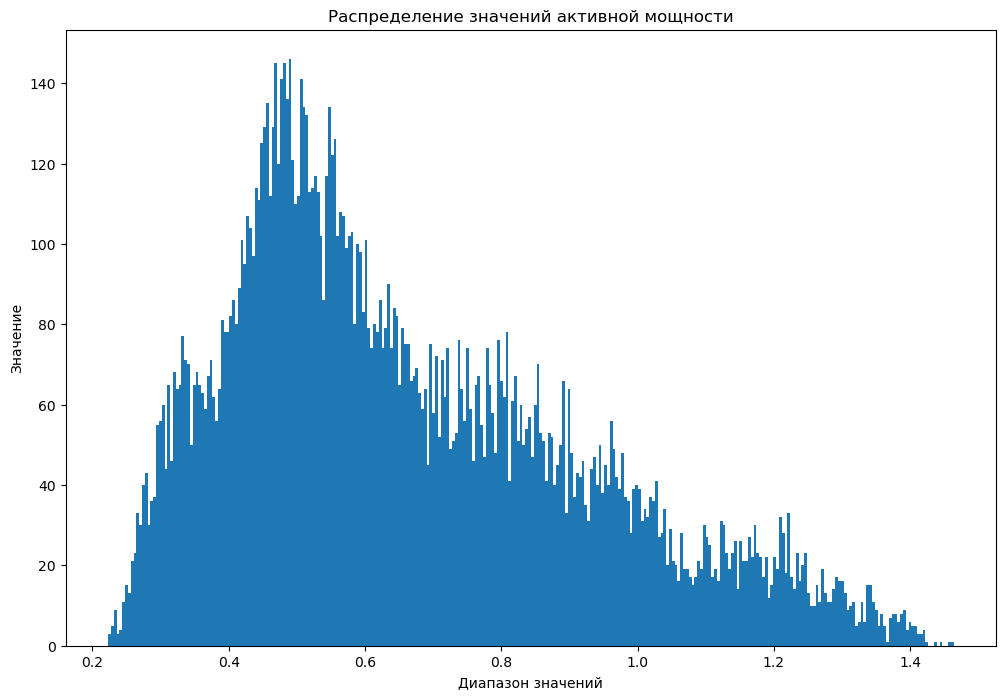

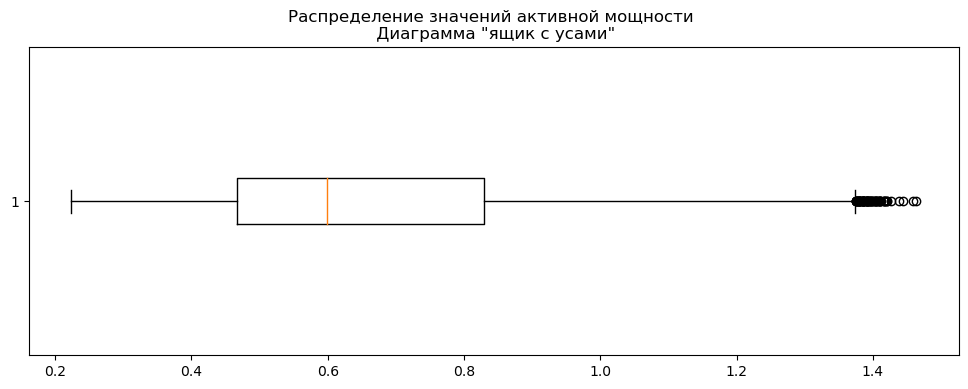

count    14876.000000
mean         0.662752
std          0.258885
min          0.223120
25%          0.467115
50%          0.599587
75%          0.830070
max          1.463773
Name: Активная мощность, dtype: float64
Количество выбросов: 72


In [12]:
plt.figure(figsize = (12, 8))
plt.hist(df_arc_new['Активная мощность'], bins = 300)
plt.title('Распределение значений активной мощности')
plt.xlabel('Диапазон значений')
plt.ylabel('Значение')
plt.show()

plt.figure(figsize = (12, 4))
plt.boxplot(df_arc_new['Активная мощность'], vert = False)
plt.title('Распределение значений активной мощности \n Диаграмма "ящик с усами"')
plt.show()

print(df_arc_new['Активная мощность'].describe())

q1 = df_arc_new['Активная мощность'].quantile(0.25)
q3 = df_arc_new['Активная мощность'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = len(df_arc_new.loc[(df_arc_new['Активная мощность'] < lower_bound) |
           (df_arc_new['Активная мощность'] > upper_bound), 'Активная мощность'])
print('Количество выбросов:', outliers)


Распределение значений активной мощности стремится к нормальному с медианой, равной 0.6. Минимальные и максимальные значения составляют 0.22 и 1.46 соответственно. Наблюдается скос в правую сторону. Имеется 72 выброса, однако в виду того что данные необходимо в дальнейшем группировать по значению 'key', выбросы в дальнейшем будут являться частью другого распределения и не будут считаться таковыми.

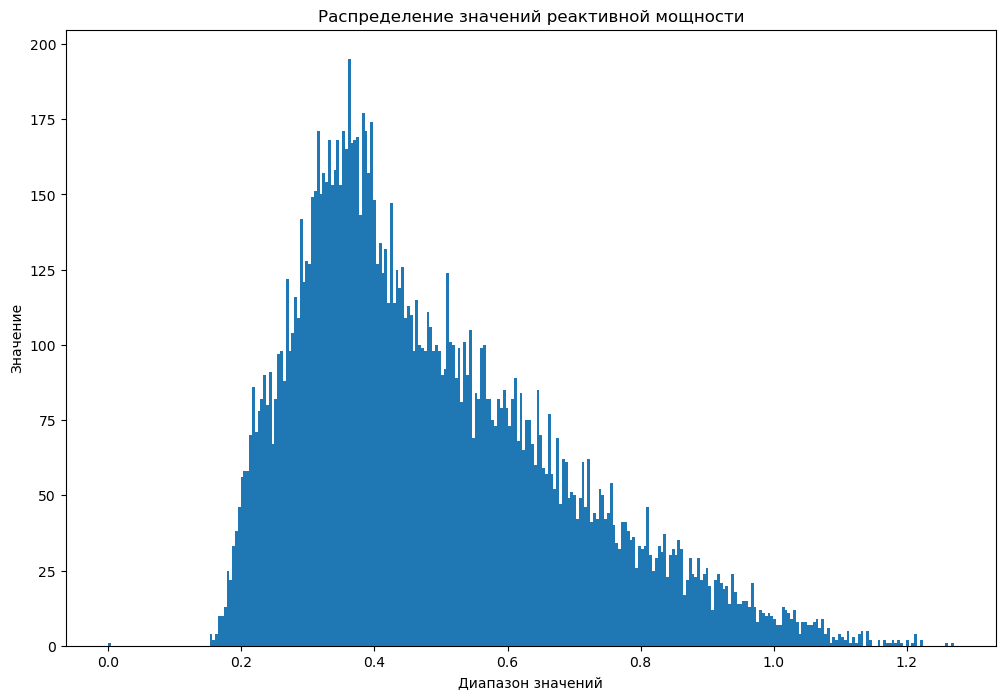

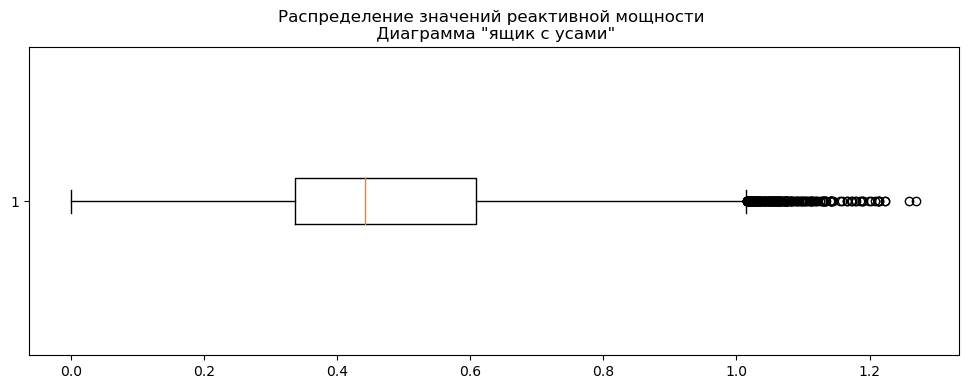

count    14876.000000
mean         0.487083
std          0.197646
min          0.000000
25%          0.337175
50%          0.441639
75%          0.608201
max          1.270284
Name: Реактивная мощность, dtype: float64
Количество выбросов: 198


In [13]:
df_arc_new.loc[df_arc_new['Реактивная мощность'] < 0, 'Реактивная мощность'] = 0
plt.figure(figsize = (12, 8))
plt.hist(df_arc_new['Реактивная мощность'], bins = 300)
plt.title('Распределение значений реактивной мощности')
plt.xlabel('Диапазон значений')
plt.ylabel('Значение')
plt.show()

plt.figure(figsize = (12, 4))
plt.boxplot(df_arc_new['Реактивная мощность'], vert = False)
plt.title('Распределение значений реактивной мощности \n Диаграмма "ящик с усами"')
plt.show()

print(df_arc_new['Реактивная мощность'].describe())

q1 = df_arc_new['Реактивная мощность'].quantile(0.25)
q3 = df_arc_new['Реактивная мощность'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = len(df_arc_new.loc[(df_arc_new['Реактивная мощность'] < lower_bound) |
           (df_arc_new['Реактивная мощность'] > upper_bound), 'Реактивная мощность'])
print('Количество выбросов:', outliers)

Было обнаружено отрицательное значение, строка с данным значением была удалена в соответствии с условием задачи. Распределение значений реактивной мощности стремится к нормальному с медианой, равной 0.44. Минимальные и максимальные значения составляют 0.0 и 1.27 соответственно. Наблюдается скос в правую сторону. Имеется 198 выбросов, однако в виду того что данные необходимо в дальнейшем группировать по значению 'key', выбросы в дальнейшем будут являться частью другого распределения и не будут считаться таковыми.

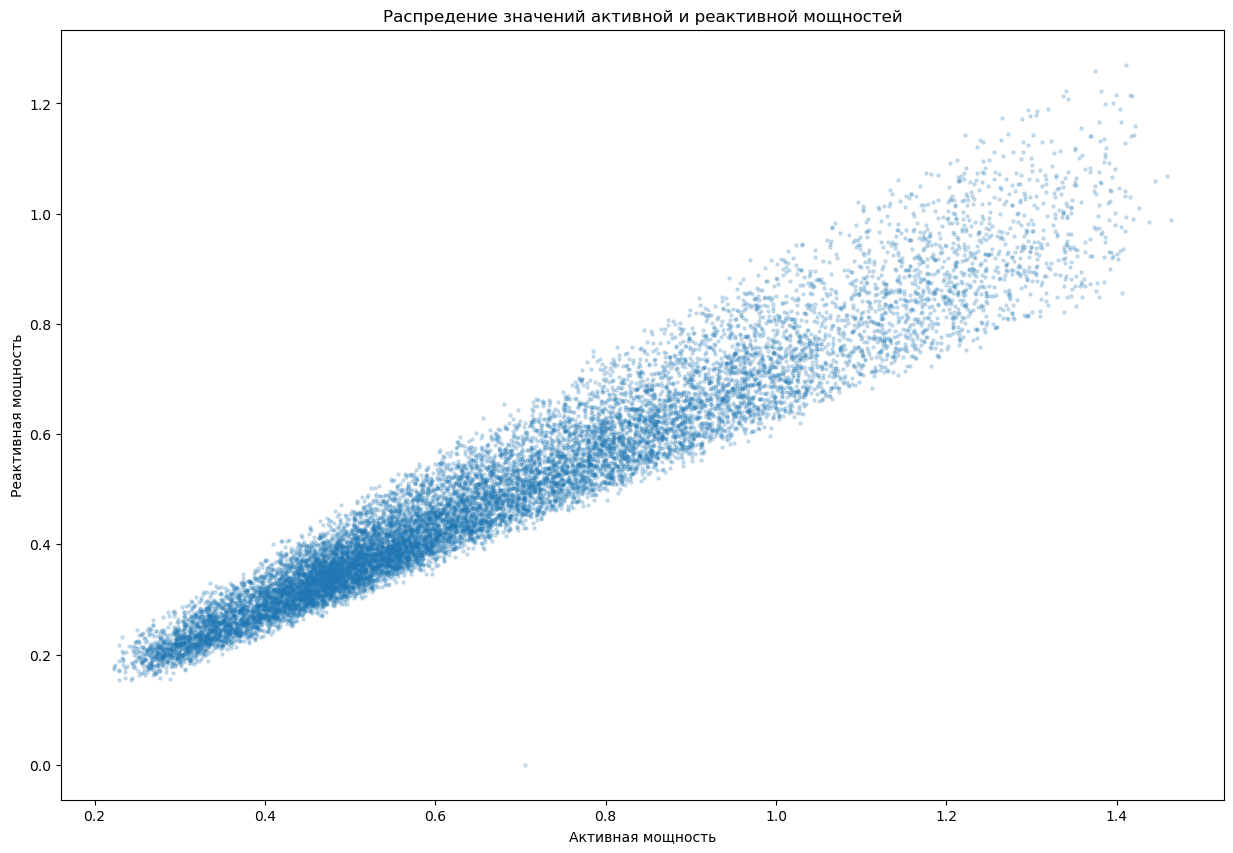

Коэффициент корреляции: 0.966147992909117


In [14]:
plt.figure(figsize = (15, 10))
plt.scatter(df_arc_new['Активная мощность'], df_arc_new['Реактивная мощность'],
            s = 5, alpha = 0.2)
plt.title('Распредение значений активной и реактивной мощностей')
plt.xlabel('Активная мощность')
plt.ylabel('Реактивная мощность')
plt.show()

print('Коэффициент корреляции:',
      df_arc_new['Активная мощность'].corr(df_arc_new['Реактивная мощность']))

По графику и значению коэф. кореляции можно сделать вывод о том, что между значениями активной и реактивной мощности существует прямая линейная зависимость.

#### Данные о подаче сыпучих материалов (объём)

In [15]:
df_bulk_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


In [16]:
print('Пропуски:\n', df_bulk_new.isna().sum())

Пропуски:
 key           0
Bulk 1     2877
Bulk 2     3107
Bulk 3     1831
Bulk 4     2115
Bulk 5     3052
Bulk 6     2553
Bulk 7     3104
Bulk 8     3128
Bulk 9     3110
Bulk 10    2953
Bulk 11    2952
Bulk 12     679
Bulk 13    3111
Bulk 14     323
Bulk 15     881
dtype: int64


Согласно условию проекта, пропуск в данном датафрейме означает остстутвие подачи соответствующего материала на соответствующей итерации. Таким образом, во время предобработки данных, пропуски в данном датафрейме необходимо заполнить нулевыми значениями.

In [17]:
print('Дубликаты:', df_bulk_new['key'].duplicated().sum())

Дубликаты: 0


Дубликаты отсутствуют.

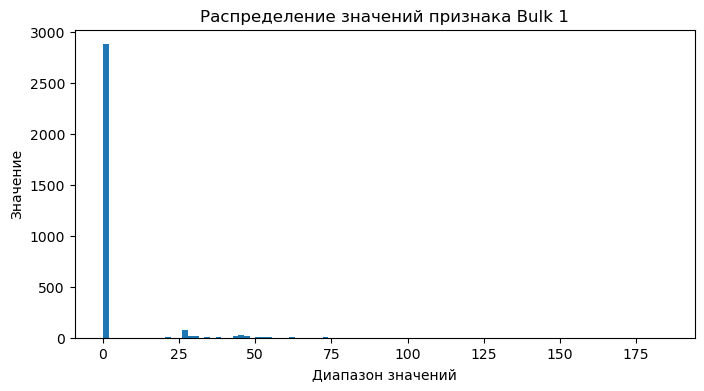

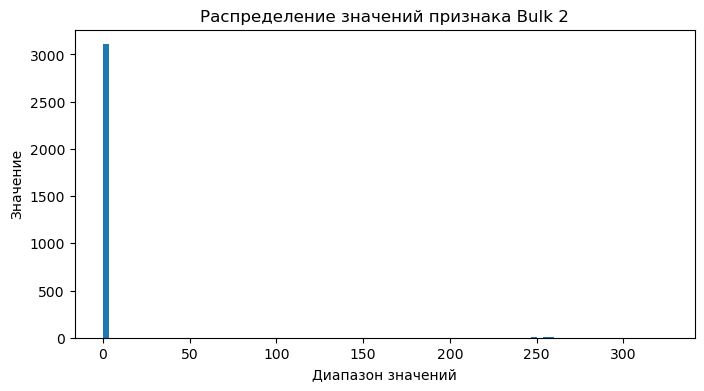

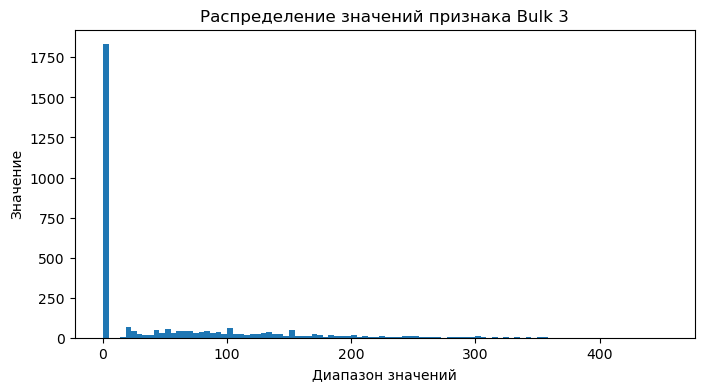

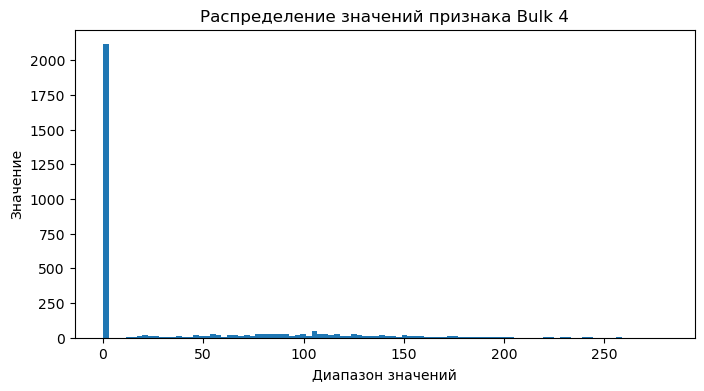

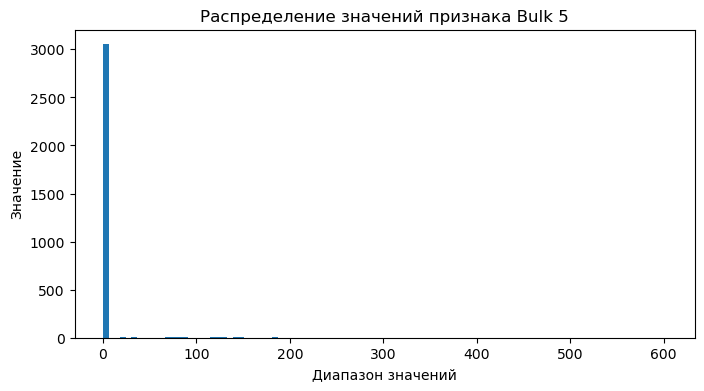

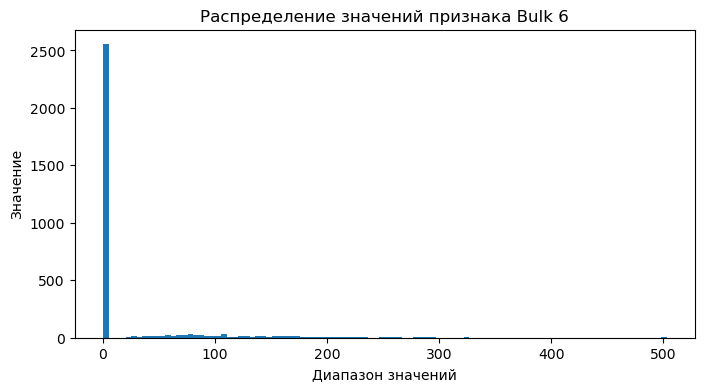

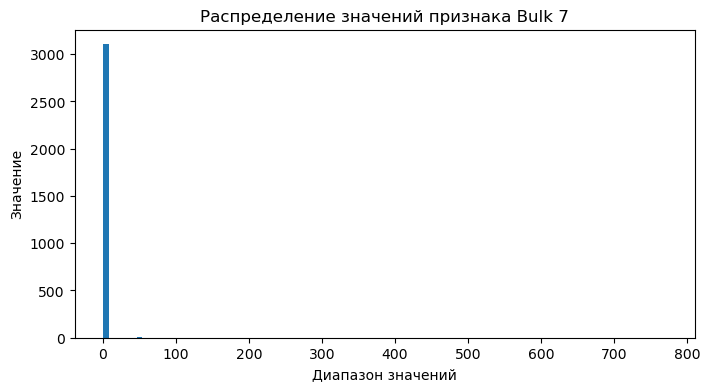

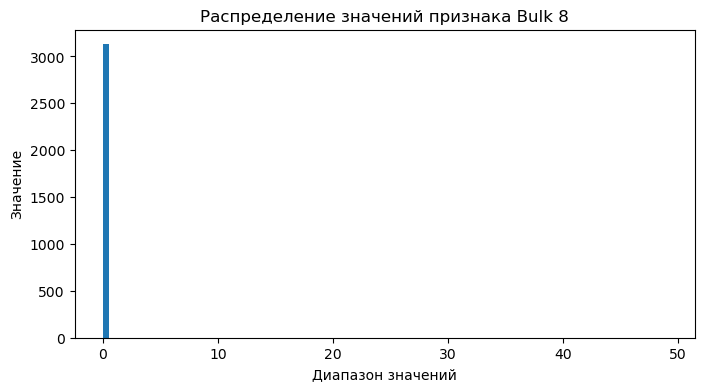

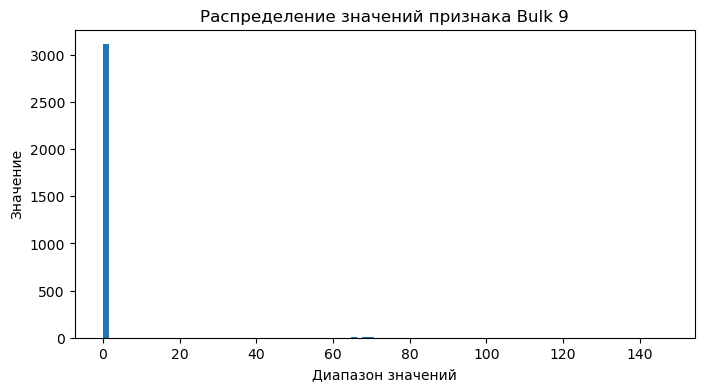

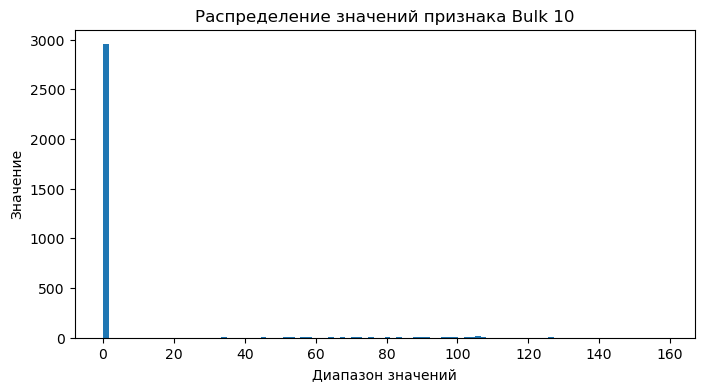

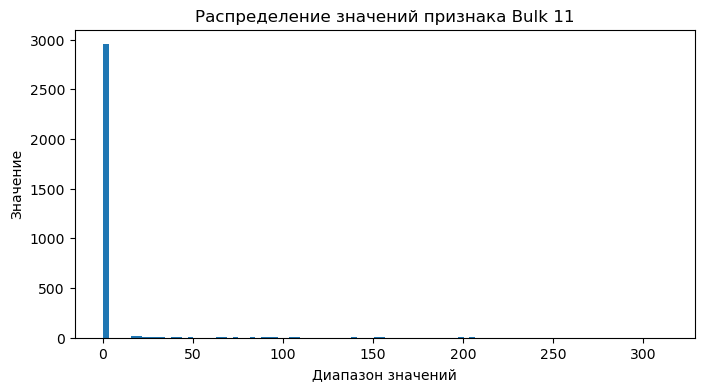

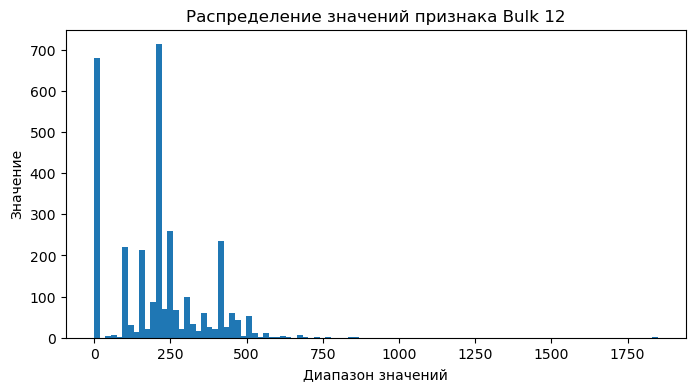

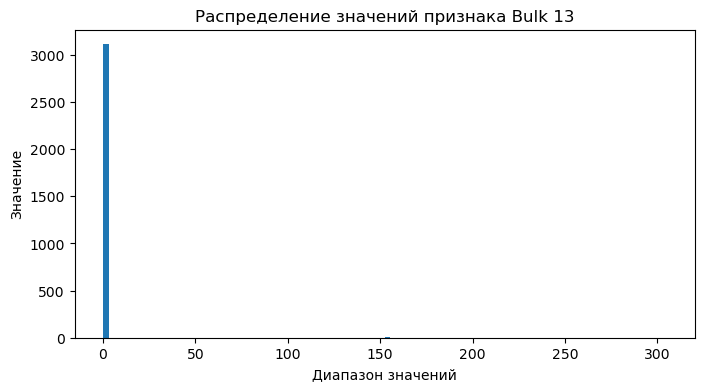

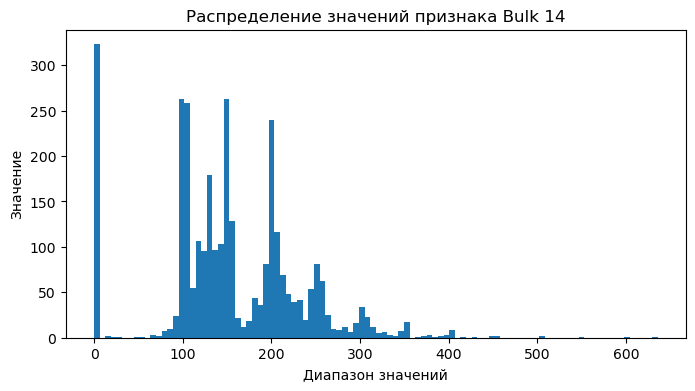

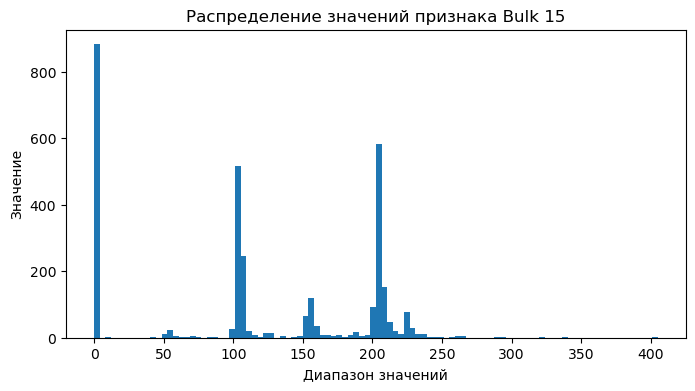

In [18]:
col_list = list(df_bulk_new.drop('key', axis = 1).columns)
df_bulk_new[df_bulk_new.isna()] = 0
for col in col_list:
    plt.figure(figsize = (8, 4))
    plt.hist(df_bulk_new[col], bins = 100)
    plt.title('Распределение значений признака ' + col)
    plt.xlabel('Диапазон значений')
    plt.ylabel('Значение')
    plt.show()

Графики распределения говорят о том, что для большей части признаком доминирующим является нулевое значение.

#### Данные о продувке сплава газом

In [19]:
df_gas_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


In [20]:
print('Пропуски:\n', df_gas_new.isna().sum())

Пропуски:
 key      0
Газ 1    0
dtype: int64


In [21]:
print('Дубликаты:', df_gas_new.duplicated().sum())

Дубликаты: 0


Пропуски и дубликаты отсутствуют.

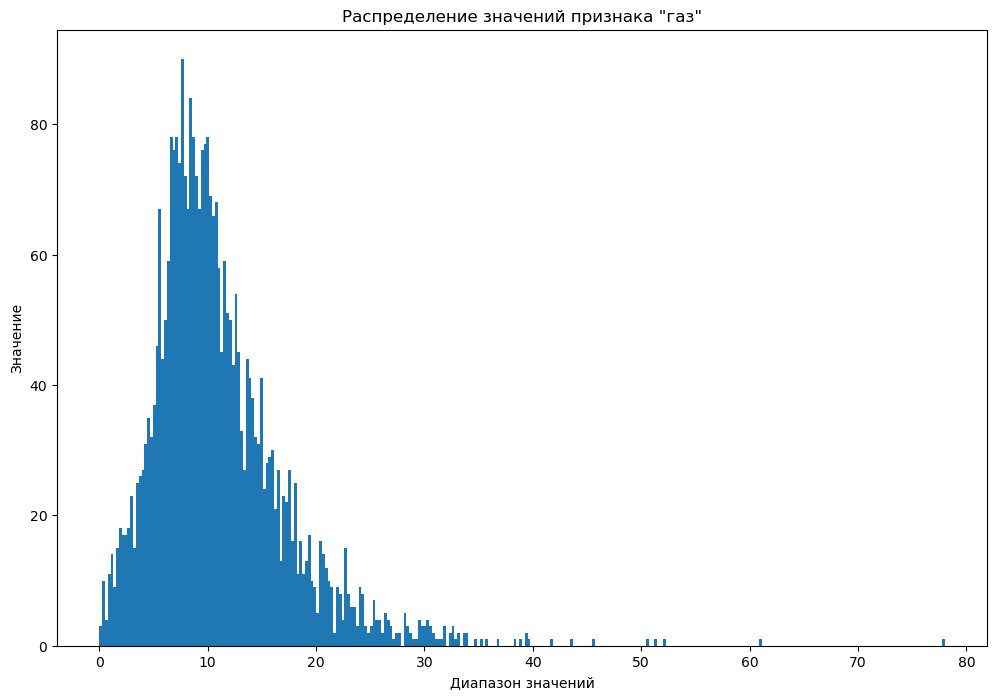

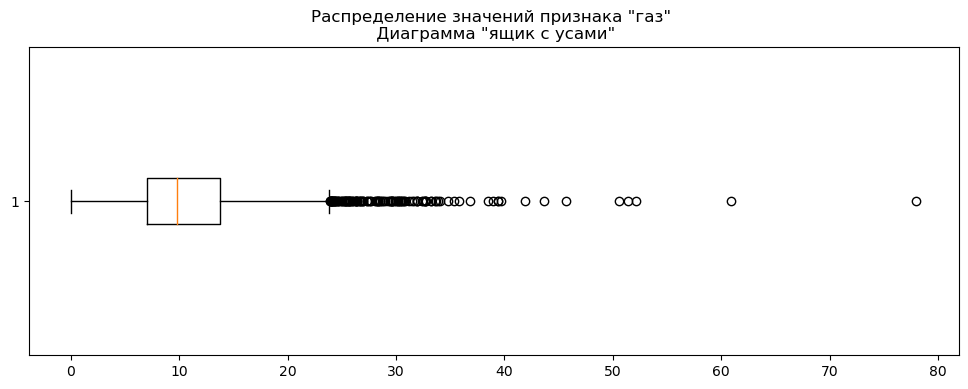

count    3239.000000
mean       11.002062
std         6.220327
min         0.008399
25%         7.043089
50%         9.836267
75%        13.769915
max        77.995040
Name: Газ 1, dtype: float64
Количество выбросов: 126


In [22]:
plt.figure(figsize = (12, 8))
plt.hist(df_gas_new['Газ 1'], bins = 300)
plt.title('Распределение значений признака "газ"')
plt.xlabel('Диапазон значений')
plt.ylabel('Значение')
plt.show()
plt.figure(figsize = (12, 4))
plt.boxplot(df_gas_new['Газ 1'], vert = False)
plt.title('Распределение значений признака "газ" \n Диаграмма "ящик с усами"')
plt.show()

print(df_gas_new['Газ 1'].describe())

q1 = df_gas_new['Газ 1'].quantile(0.25)
q3 = df_gas_new['Газ 1'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = len(df_gas_new.loc[(df_gas_new['Газ 1'] < lower_bound) |
           (df_gas_new['Газ 1'] > upper_bound), 'Газ 1'])
print('Количество выбросов:', outliers)

Распределение значений показателя "Газ 1" стремится к нормальному с медианой, равной 9.84. Минимальные и максимальные значения составляют 0.008 и 77.99 соответственно. Наблюдается скос в правую сторону. Имеется 126 выбросов.

#### Данные об измерениях температуры

In [23]:
df_temp_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18092 entries, 0 to 18091
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           18092 non-null  int64  
 1   Время замера  18092 non-null  object 
 2   Температура   14665 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 424.2+ KB


In [24]:
print('Пропуски:\n', df_temp_new.isna().sum())

Пропуски:
 key                0
Время замера       0
Температура     3427
dtype: int64


In [25]:
print('Дубликаты:', df_temp_new.duplicated().sum())

Дубликаты: 0


Дубликаты отсутствуют.

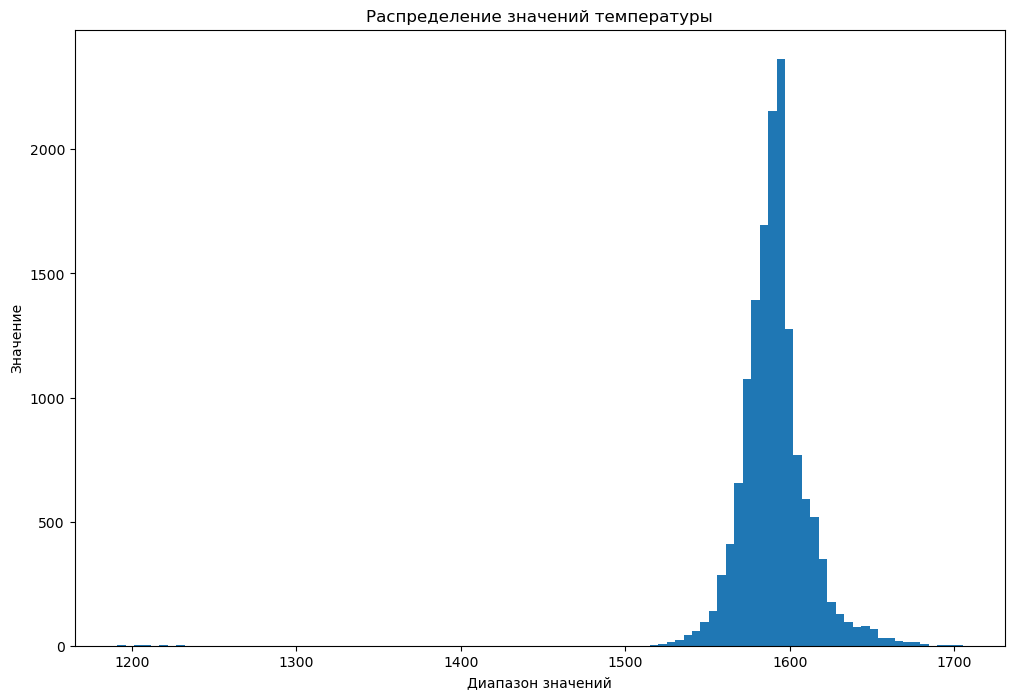

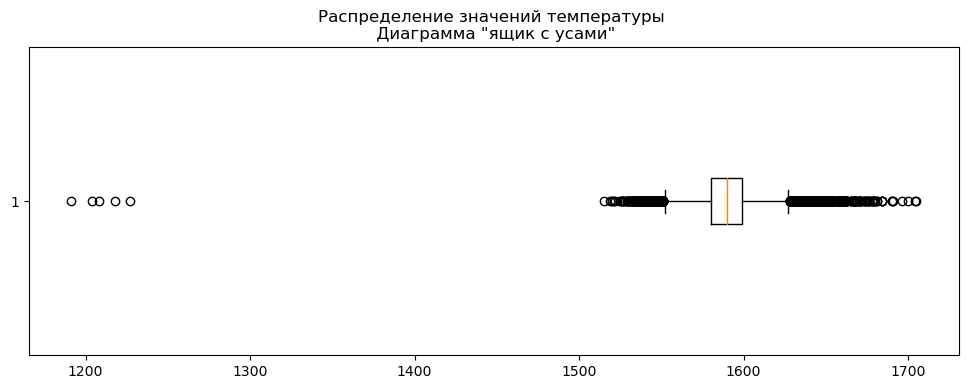

count    14665.000000
mean      1590.722741
std         20.394381
min       1191.000000
25%       1580.000000
50%       1590.000000
75%       1599.000000
max       1705.000000
Name: Температура, dtype: float64
Количество выбросов: 835


In [26]:
plt.figure(figsize = (12, 8))
plt.hist(df_temp_new['Температура'], bins = 100)
plt.title('Распределение значений температуры')
plt.xlabel('Диапазон значений')
plt.ylabel('Значение')
plt.show()

plt.figure(figsize = (12, 4))
plt.boxplot(df_temp_new.loc[df_temp_new['Температура'] > 1000, 'Температура'], vert = False)
plt.title('Распределение значений температуры \n Диаграмма "ящик с усами"')
plt.show()

print(df_temp_new['Температура'].describe())

q1 = df_temp_new['Температура'].quantile(0.25)
q3 = df_temp_new['Температура'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = len(df_temp_new.loc[(df_temp_new['Температура'] < lower_bound) |
           (df_temp_new['Температура'] > upper_bound), 'Температура'])
print('Количество выбросов:', outliers)

Распределение значений температуры стремится к нормальному с медианой, равной 1590. Минимальные и максимальные значения составляют 1191 и 1580 соответственно. Фактически скоса не наблюдается и наблюдение можно назвать близким к симметричному, однако со стороны минимальных значений наблюдается 835 выбросов.

#### Данные о проволочных материалах (объём)

In [27]:
df_wire_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


In [28]:
print('Пропуски:\n', df_wire_new.isna().sum())

Пропуски:
 key          0
Wire 1      26
Wire 2    2002
Wire 3    3018
Wire 4    3067
Wire 5    3080
Wire 6    3008
Wire 7    3070
Wire 8    3062
Wire 9    3052
dtype: int64


Согласно условию проекта, пропуск в данном датафрейме означает остстутвие подачи соответствующего материала на соответствующей итерации. Таким образом, во время предобработки данных, пропуски в данном датафрейме необходимо заполнить нулевыми значениями.

In [29]:
print('Дубликаты:', df_wire_new['key'].duplicated().sum())

Дубликаты: 0


Дубликаты в данном датафрейме отсутствуют.

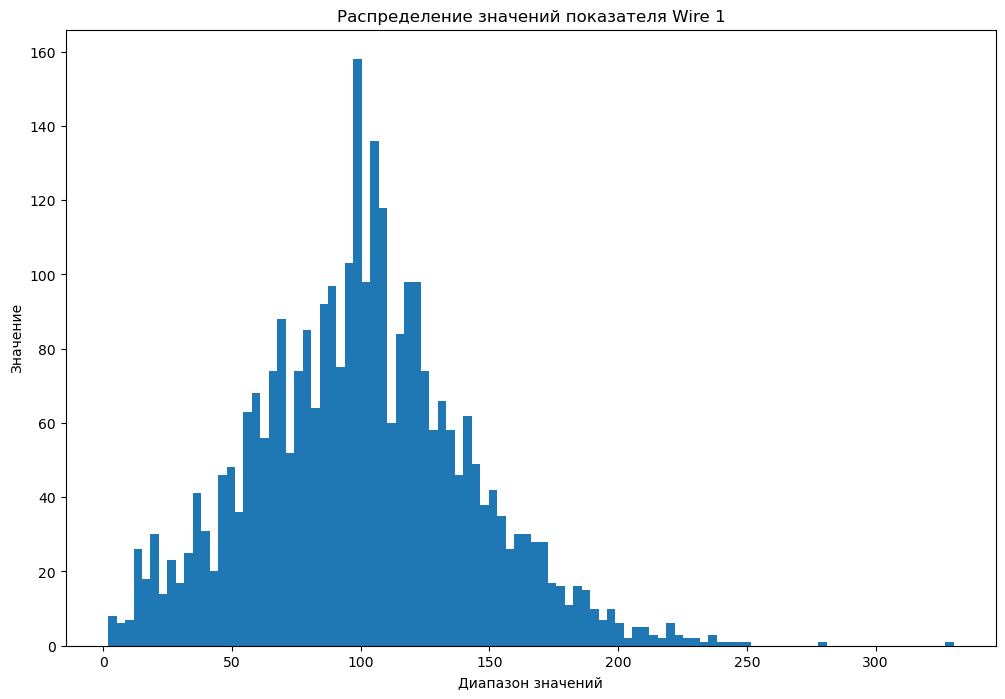

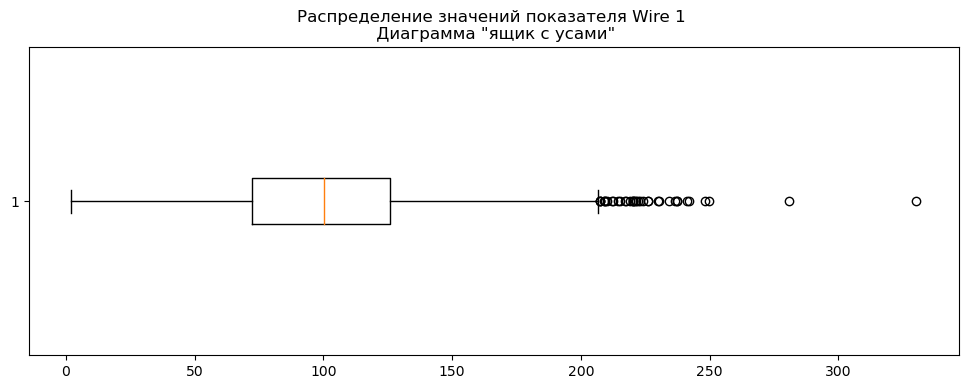

count    3055.000000
mean      100.895853
std        42.012518
min         1.918800
25%        72.115684
50%       100.158234
75%       126.060483
max       330.314424
Name: Wire 1, dtype: float64
Количество выбросов: 36


In [30]:
plt.figure(figsize = (12, 8))
plt.hist(df_wire_new['Wire 1'], bins = 100)
plt.title('Распределение значений показателя Wire 1')
plt.xlabel('Диапазон значений')
plt.ylabel('Значение')
plt.show()

plt.figure(figsize = (12, 4))
plt.boxplot(df_wire_new.loc[df_wire_new['Wire 1'] < 400, 'Wire 1'], vert = False)
plt.title('Распределение значений показателя Wire 1 \n Диаграмма "ящик с усами"')
plt.show()

print(df_wire_new['Wire 1'].describe())

q1 = df_wire_new['Wire 1'].quantile(0.25)
q3 = df_wire_new['Wire 1'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = len(df_wire_new.loc[(df_wire_new['Wire 1'] < lower_bound) |
           (df_wire_new['Wire 1'] > upper_bound), 'Wire 1'])
print('Количество выбросов:', outliers)

Распределение значений показателя 'Wire 1' стремится к симметрично нормальному с медианой, равной 100.15. Минимальные и максимальные значения составляют 1.91 и 330.31 соответственно. Наблюдается 835 выбросов. 

Для остальных признаков нулевое значение является доминирующим.

### Вывод

Для выполнения последующих работ были импортированы необходимые библиотеки. Данные были загружены в соответствующие датафреймы. Для признаков был проведен предварительный исследовательский анализ данных и были сделаны следующие выводы:
    
- Во всех датафреймах отсутствуют дубликаты;
- В датафрейме "Данные об электродах", для признаков "Активная мощность", "Реактивная мощность" был определен характер распределения значений, выявлено отсутствие пропусков, выявлены выбросы, установлена прямая линейная зависимость между данными признаками. Также для признака "Реактивня мощность" выявлено аномальное значение;
- В датафреймах "Данные о подаче сыпучих материалов (объём)" и "Данные о проволочных материалах (объём)" для большей части признаком доминирующим значением является пропуск (нулевое значение), также выявлены признаки, для которых более 80% значениий пропуски, таки образом данные признаки не подходят для дальнейшего обучения моделей ;
- В датафрейме "Данные о продувке сплава газом", "Результаты измерения температуры" для соответствующих признаков был определен характер распределения значений, выявлено отсутствие пропусков, выявлены выбросы.


### План работы

- Выполнение предобработки данных. Данный шаг включает в себя:
  - Приведение данных к необходимому формату (дата и время);
  - Удаление аномальных значений (темп. < 1500, отрицательная реактивная мощность)
  - Удаление ключей, у которых количество замеров температуры равно 1, ключей с промежуточными значениями температур; 
  - Генерация новых признаков (полная мощность, работа, число итераций, время нагрева дугой, время замера между первой и последней температуры)
  - Отбор признаков - удаление признаков с большим количеством пропусков или константой.
  - Объедиение датафрейма в единую таблицу, с учетом агрегации некоторых датафреймов;
  - Удаление признака "key";
  - Получение итогого датафрейма с количеством ключей не более 2332.
- Выполнение исследовательского анализа данных. Данный шаг вклюяет в себя:
  - Исследование распределений признаков - построение гистограмм, графиков "boxplot", определение чсловых характеристик методом describe();
  - Построение кореляционной матрицы, построение тепловой карты, поиск взаимосвязей между признакми, построение графиков расположения для данных признаков.
- Обучение моделей машинного обучения. Данный шаг включает в себя:
  - Разделение выборки на обучающую (не менее 1700) и тестовую, выделение обучающих признаков и цели;
  - Обработка пропусков на тренировочной выборке;
  - Для модели линейной регрессии удалить один из признаков в высококоллерирующих парах;
  - Стандартизация данных для модели линейной регрессии (обучение на тренировочной выборке, трансформаия тренировочной и тестовой выборок);
  - Обучение моделей "Линейная регрессия", "CatBoostRegressor", "LGBMRegressor" на тренировочной выборке:
    - Подбор гиперпараметров с помощью GridSearch или RandomizedSearch;
    - Валидационная выборка в пропорции 1:4;
    - Определение модели с лучшим показателем метрики MAE.
- Тестирование лучшей модели:
  - Обучение лучшей модели с оптимальными гиперпараметрами на тренировочной выборки, предсказание значений на тестовой выборке и определение итоговой метрики MAE и метрики R2;
  - Сравнение с константной моделью DummyRegressor;
  - Исследование важности признаков для лучшей модели.
  
   

## Предобработка данных

### Приведение данных к необходимому формату

In [31]:
df_arc_new['Начало нагрева дугой'] = pd.to_datetime(df_arc_new['Начало нагрева дугой'], format = '%Y-%m-%d %H:%M')
df_arc_new['Конец нагрева дугой'] = pd.to_datetime(df_arc_new['Конец нагрева дугой'], format = '%Y-%m-%d %H:%M')

for i in range(1,16):
    df_bulk_time_new['Bulk ' + str(i)] = pd.to_datetime(df_bulk_time_new['Bulk ' + str(i)],
                                                        format = '%Y-%m-%d %H:%M')

df_temp_new['Время замера'] = pd.to_datetime(df_temp_new['Время замера'], format = '%Y-%m-%d %H:%M')    

for i in range(1, 10):
    df_wire_time_new['Wire ' + str(i)] = pd.to_datetime(df_wire_time_new['Wire ' + str(i)],
                                                        format = '%Y-%m-%d %H:%M')

### Удаление аномальных значений

При предварительном анализе данны выявлено отрицательное значение мощности. По условию проекта данный ключ необходимо удалить.

In [32]:
df_arc_new = df_arc_new[df_arc_new['Реактивная мощность'] > 0]

Перед удаленением ключей с аномальными значениями температур создадим новый признак с количеством итераций:

In [33]:
fff = pd.DataFrame({'Количество' : df_temp_new.groupby('key')['key'].count()}).reset_index()

По условию проекта температура ниже 1500 считается аномальной, ключи с такими значениями температур необходимо удалить.

In [34]:
old = df_temp_new.shape[0]
df_temp_new = df_temp_new[df_temp_new['Температура'] >= 1500]
print('Удалено строк:', old - df_temp_new.shape[0])

Удалено строк: 3432


По условию проекта необходимо удалить ключи с промежуточными значениями температур а также ключи, в которых один замер температуры.

In [35]:
old = df_temp_new.shape[0]

df_temp_new_gr = df_temp_new.groupby('key')['Температура'].count()
fil_list = list(df_temp_new_gr[df_temp_new_gr > 1].index)
df_temp_new = df_temp_new[df_temp_new['key'].isin(fil_list)]

print('Удалено строк:', old - df_temp_new.shape[0])


Удалено строк: 740


In [36]:
old = df_temp_new.shape[0]

min_list = list(df_temp_new.groupby('key')['Время замера'].min())
max_list = list(df_temp_new.groupby('key')['Время замера'].max())

df_temp_new = df_temp_new[(df_temp_new['Время замера'].isin(min_list)) | 
                         (df_temp_new['Время замера'].isin(max_list))]

print('Удалено строк:', old - df_temp_new.shape[0])
df_temp_new

Удалено строк: 8970


key        Время замера  Температура
0         1 2019-05-03 11:02:04       1571.0
5         1 2019-05-03 11:30:38       1613.0
6         2 2019-05-03 11:34:04       1581.0
10        2 2019-05-03 11:55:09       1602.0
11        3 2019-05-03 12:06:44       1596.0
...     ...                 ...          ...
13914  2497 2019-08-10 12:53:28       1589.0
13915  2498 2019-08-10 12:58:11       1591.0
13920  2498 2019-08-10 13:23:31       1594.0
13921  2499 2019-08-10 13:33:21       1569.0
13925  2499 2019-08-10 13:58:58       1603.0

[4950 rows x 3 columns]

### Генерация новых признаков

Полная мощность:

In [37]:
df_arc_new['Полная мощность'] = (df_arc_new['Активная мощность'] ** 2 + 
                                 df_arc_new['Реактивная мощность'] ** 2) ** 0.5

Работа:

In [38]:
f_date = df_arc_new['Начало нагрева дугой'].apply(lambda x: x.timestamp())
s_date = df_arc_new['Конец нагрева дугой'].apply(lambda x: x.timestamp())
df_arc_new['Работа'] = (s_date - f_date) * df_arc_new['Полная мощность']

Время нагрева дугой:

In [39]:
df_arc_new['Время нагрева дугой'] = s_date - f_date

In [40]:
df_arc_new.head()

key Начало нагрева дугой Конец нагрева дугой  Активная мощность  \
0    1  2019-05-03 11:02:14 2019-05-03 11:06:02           0.305130   
1    1  2019-05-03 11:07:28 2019-05-03 11:10:33           0.765658   
2    1  2019-05-03 11:11:44 2019-05-03 11:14:36           0.580313   
3    1  2019-05-03 11:18:14 2019-05-03 11:24:19           0.518496   
4    1  2019-05-03 11:26:09 2019-05-03 11:28:37           0.867133   

   Реактивная мощность  Полная мощность      Работа  Время нагрева дугой  
0             0.211253         0.371123   84.616003                228.0  
1             0.477438         0.902319  166.928978                185.0  
2             0.430460         0.722536  124.276277                172.0  
3             0.379979         0.642824  234.630603                365.0  
4             0.643691         1.079934  159.830252                148.0

Время между замерами первой и последней температуры:

In [41]:
min_ = df_temp_new.groupby('key')['Время замера'].min().apply(lambda x: x.timestamp())
max_ = df_temp_new.groupby('key')['Время замера'].max().apply(lambda x: x.timestamp())
interval =  pd.DataFrame({'Временной интервал' : max_ - min_},).reset_index()
df_temp_new = pd.merge(df_temp_new, interval, on = 'key', how = 'left')

Определение первой и последней температуры как отдельных признаков:

In [42]:
date_min = list(df_temp_new.groupby('key')['Время замера'].min())
df_temp_min = df_temp_new.loc[df_temp_new['Время замера'].isin(date_min), ['key', 'Температура']]
df_temp_min.rename(columns = {'Температура':'Нач-я температура'}, inplace = True)
df_temp_new = pd.merge(df_temp_new, df_temp_min, on = 'key', how = 'left')
df_temp_new

date_max = list(df_temp_new.groupby('key')['Время замера'].max())
df_temp_max = df_temp_new.loc[df_temp_new['Время замера'].isin(date_max), ['key', 'Температура']]
df_temp_max.rename(columns = {'Температура':'Кон-я температура'}, inplace = True)
df_temp_new = pd.merge(df_temp_new, df_temp_max, on = 'key', how = 'left')

df_temp_new = df_temp_new.drop(['Время замера','Температура'], axis = 1).drop_duplicates()
df_temp_new.head()

key  Временной интервал  Нач-я температура  Кон-я температура
0    1              1714.0             1571.0             1613.0
2    2              1265.0             1581.0             1602.0
4    3              1753.0             1596.0             1599.0
6    4              1220.0             1601.0             1625.0
8    5              1536.0             1576.0             1602.0

### Отбор признаков

Производим удаление признаков, для которых больше 80% значений - пропуски (согласно условиям проекта были заполнены нулевыми значениями).

In [43]:
old = df_bulk_new.shape[1]
list_bulk = []
for col in df_bulk_new.columns:
    if df_bulk_new[df_bulk_new[col] == 0].shape[0] / df_bulk_new.shape[0] < 0.8:
        list_bulk.append(col)
df_bulk_new = df_bulk_new[list_bulk] 
print('Удалено признаков -', old - df_bulk_new.shape[1])
df_bulk_new.head()

Удалено признаков - 10


key  Bulk 3  Bulk 4  Bulk 12  Bulk 14  Bulk 15
0    1     0.0    43.0    206.0    150.0    154.0
1    2     0.0    73.0    206.0    149.0    154.0
2    3     0.0    34.0    205.0    152.0    153.0
3    4     0.0    81.0    207.0    153.0    154.0
4    5     0.0    78.0    203.0    151.0    152.0

In [44]:
old = df_wire_new.shape[1]
list_wire = []
df_wire_new = df_wire_new.fillna(0)
for col in df_wire_new.columns:
    if df_wire_new[df_wire_new[col] == 0].shape[0] / df_wire_new.shape[0] < 0.8:
        list_wire.append(col)
df_wire_new = df_wire_new[list_wire] 
print('Удалено признаков -', old - df_wire_new.shape[1])
df_wire_new.head()

Удалено признаков - 7


key     Wire 1   Wire 2
0    1  60.059998  0.00000
1    2  96.052315  0.00000
2    3  91.160157  0.00000
3    4  89.063515  0.00000
4    5  89.238236  9.11456

Удаленение признака даты в датафрейме 'Данные об электродах'.

In [45]:
df_arc_new = df_arc_new.drop(['Начало нагрева дугой', 'Конец нагрева дугой'], axis = 1)
df_arc_new.head()

key  Активная мощность  Реактивная мощность  Полная мощность      Работа  \
0    1           0.305130             0.211253         0.371123   84.616003   
1    1           0.765658             0.477438         0.902319  166.928978   
2    1           0.580313             0.430460         0.722536  124.276277   
3    1           0.518496             0.379979         0.642824  234.630603   
4    1           0.867133             0.643691         1.079934  159.830252   

   Время нагрева дугой  
0                228.0  
1                185.0  
2                172.0  
3                365.0  
4                148.0

### Объедиение датафрейма в единую таблицу

Агрегация датафреймов "Данные об электродах":

In [46]:
df_arc_new_gr = pd.DataFrame(df_arc_new.groupby('key').mean()).reset_index()
df_arc_new_gr.head()

key  Активная мощность  Реактивная мощность  Полная мощность      Работа  \
0    1           0.607346             0.428564         0.743747  154.056423   
1    2           0.534852             0.363339         0.647087  120.440001   
2    3           0.812728             0.587491         1.003845  144.567534   
3    4           0.676622             0.514248         0.850010  170.863899   
4    5           0.563238             0.421998         0.704245  128.042484   

   Время нагрева дугой  
0               219.60  
1               202.75  
2               131.00  
3               185.25  
4               217.25

Объединение таблиц.

In [47]:
df_all = pd.merge(df_arc_new_gr, df_bulk_new, how = 'inner')
df_all = pd.merge(df_all, df_gas_new, how = 'inner')
df_all = pd.merge(df_all, df_temp_new, how = 'inner')
df_all = pd.merge(df_all, df_wire_new, how = 'inner')
df_all = pd.merge(df_all, fff, how = 'inner')
df_all = df_all.drop('key', axis = 1)
print(df_all.info())
df_all.tail()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2329 entries, 0 to 2328
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Активная мощность    2329 non-null   float64
 1   Реактивная мощность  2329 non-null   float64
 2   Полная мощность      2329 non-null   float64
 3   Работа               2329 non-null   float64
 4   Время нагрева дугой  2329 non-null   float64
 5   Bulk 3               2329 non-null   float64
 6   Bulk 4               2329 non-null   float64
 7   Bulk 12              2329 non-null   float64
 8   Bulk 14              2329 non-null   float64
 9   Bulk 15              2329 non-null   float64
 10  Газ 1                2329 non-null   float64
 11  Временной интервал   2329 non-null   float64
 12  Нач-я температура    2329 non-null   float64
 13  Кон-я температура    2329 non-null   float64
 14  Wire 1               2329 non-null   float64
 15  Wire 2               2329 non-null   f

Активная мощность  Реактивная мощность  Полная мощность      Работа  \
2324           0.792033             0.552734         0.967180  173.544332   
2325           0.695820             0.478672         0.845053  135.969756   
2326           1.201746             0.817364         1.453639  274.340173   
2327           0.640462             0.447964         0.781983  116.362148   
2328           0.434271             0.324209         0.542313  133.096546   

      Время нагрева дугой  Bulk 3  Bulk 4  Bulk 12  Bulk 14  Bulk 15  \
2324           180.750000    21.0     0.0    256.0    129.0    223.0   
2325           156.666667     0.0    63.0    256.0    129.0    226.0   
2326           189.666667     0.0    85.0    230.0    124.0    226.0   
2327           150.000000    90.0     0.0    206.0    129.0    207.0   
2328           220.750000    47.0     0.0    233.0    126.0    227.0   

          Газ 1  Временной интервал  Нач-я температура  Кон-я температура  \
2324   7.125735              1380.0             1570.0             1591.0   
2325   9.412616              1705.0             1554.0             1591.0   
2326   6.271699               962.0             1571.0             1589.0   
2327  14.953657              1520.0             1591.0             1594.0   
2328  11.336151              1537.0             1569.0             1603.0   

          Wire 1    Wire 2  Количество  
2324   89.150879   0.00000           5  
2325  114.179527   0.00000           7  
2326   94.086723   9.04800           4  
2327  118.110717   0.00000           6  
2328  110.160958  50.00528           5

## Исследовательский анализ данных

### Исследование распределений значений признаков

#### Признаки 'Активная мощность','Реактивная мощность', 'Полная мощность'

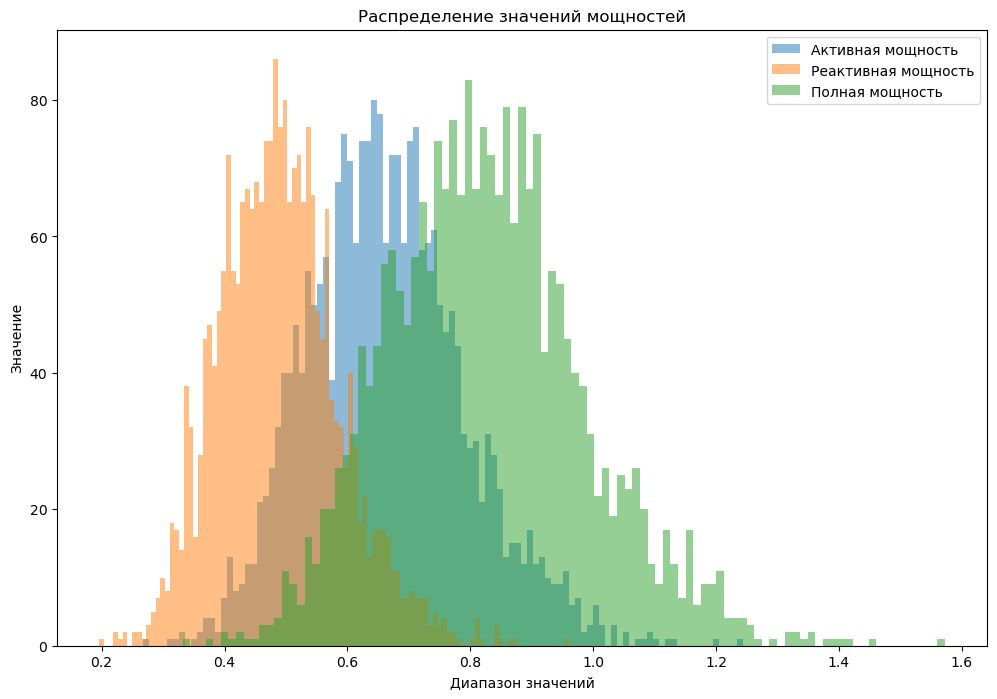

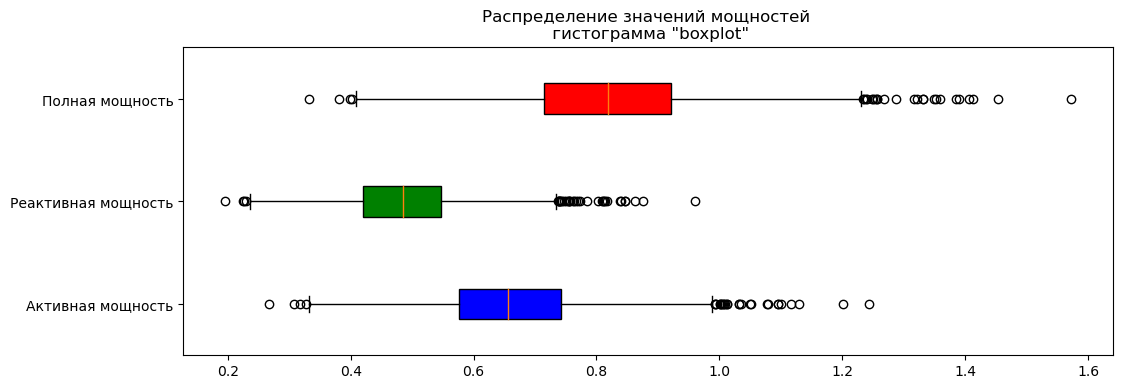

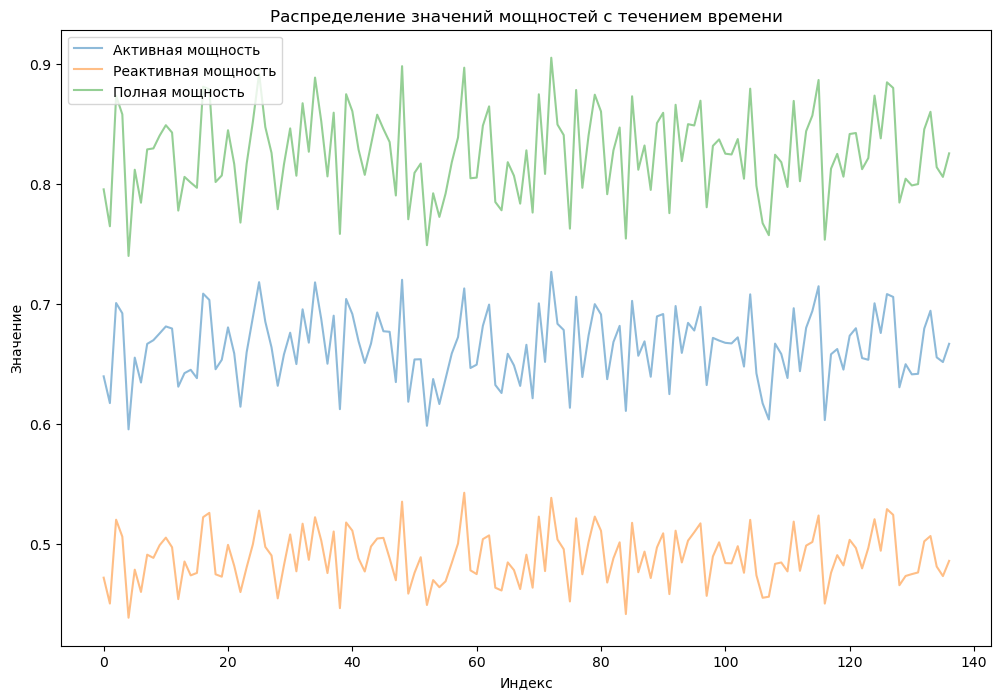

In [48]:
plt.figure(figsize = (12, 8))
plt.hist(df_all['Активная мощность'], bins = 100, alpha = 0.5)
plt.hist(df_all['Реактивная мощность'], bins = 100, alpha = 0.5)
plt.hist(df_all['Полная мощность'], bins = 100, alpha = 0.5)
plt.title('Распределение значений мощностей')
plt.xlabel('Диапазон значений')
plt.ylabel('Значение')
plt.legend(['Активная мощность','Реактивная мощность', 'Полная мощность'])
plt.show()

data = [df_all['Активная мощность'], df_all['Реактивная мощность'], df_all['Полная мощность']]
labels = ['Активная мощность', 'Реактивная мощность', 'Полная мощность']
colors = ['blue', 'green', 'red']
plt.figure(figsize = (12, 4))
x = plt.boxplot(data, labels = labels, patch_artist = True, vert = False)
for box, color in zip(x['boxes'], colors):
    box.set(facecolor = color)
plt.title('Распределение значений мощностей \n гистограмма "boxplot"')
plt.show()

plt.figure(figsize = (12, 8))
plt.plot(np.mean(np.array(df_all['Активная мощность']).reshape(-1, 17), axis=1), alpha = 0.5)
plt.plot(np.mean(np.array(df_all['Реактивная мощность']).reshape(-1, 17), axis=1), alpha = 0.5)
plt.plot(np.mean(np.array(df_all['Полная мощность']).reshape(-1, 17), axis=1), alpha = 0.5)
plt.legend(['Активная мощность','Реактивная мощность', 'Полная мощность'])
plt.title('Распределение значений мощностей с течением времени')
plt.xlabel('Индекс')
plt.ylabel('Значение')
plt.show()

In [49]:
for col in labels:
    print(f'{col}:\n', df_all[col].describe())
    q1 = df_all[col].quantile(0.25)
    q3 = df_all[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = len(df_all[col].loc[(df_all[col] < lower_bound) | (df_all[col] > upper_bound)])
    print('Количество выбросов:', outliers, '\n')

Активная мощность:
 count    2329.000000
mean        0.664095
std         0.128350
min         0.267676
25%         0.576249
50%         0.655642
75%         0.741566
max         1.243889
Name: Активная мощность, dtype: float64
Количество выбросов: 30 

Реактивная мощность:
 count    2329.000000
mean        0.488897
std         0.097947
min         0.196228
25%         0.420051
50%         0.484690
75%         0.546490
max         0.960763
Name: Реактивная мощность, dtype: float64
Количество выбросов: 36 

Полная мощность:
 count    2329.000000
mean        0.825536
std         0.160307
min         0.331897
25%         0.714331
50%         0.818378
75%         0.921106
max         1.572238
Name: Полная мощность, dtype: float64
Количество выбросов: 28 



Было исследовано распределений значений для признаков 'Активная мощность', 'Реактивная мощность', 'Полная мощность': построены гистограммы, диаграммы "ящик с усами", графики изменения значений с течением времени (использование индексов позволяет отслеживать изменения во времени, без привязки к конкретным временным точкам). Были сделаны следующие выводы:

- Определен характер распределений - для всех трех признаков нормальное распределение с небольшим скосом вправо;
- В среднем значения активной мощности превосходят значения реактивной мощности;
- С течением времени общая тенденция значений для всех трех признаков остается стабильной;
- Были определены выбросы;
- Числовые характеристики:

|Признак|Среднее значение|Медиана|Минимум|Максимум|Количество выбросов|
|-|-|-|-|-|-|
|Активная мощность|0.66|0.66|0.27|1.24|30|
|Реактивная мощность|0.49|0.48|0.19|0.96|30|
|Полная мощность|0.66|0.48|0.19|0.96|36|



#### Признаки 'Время нагрева дугой', 'Работа'

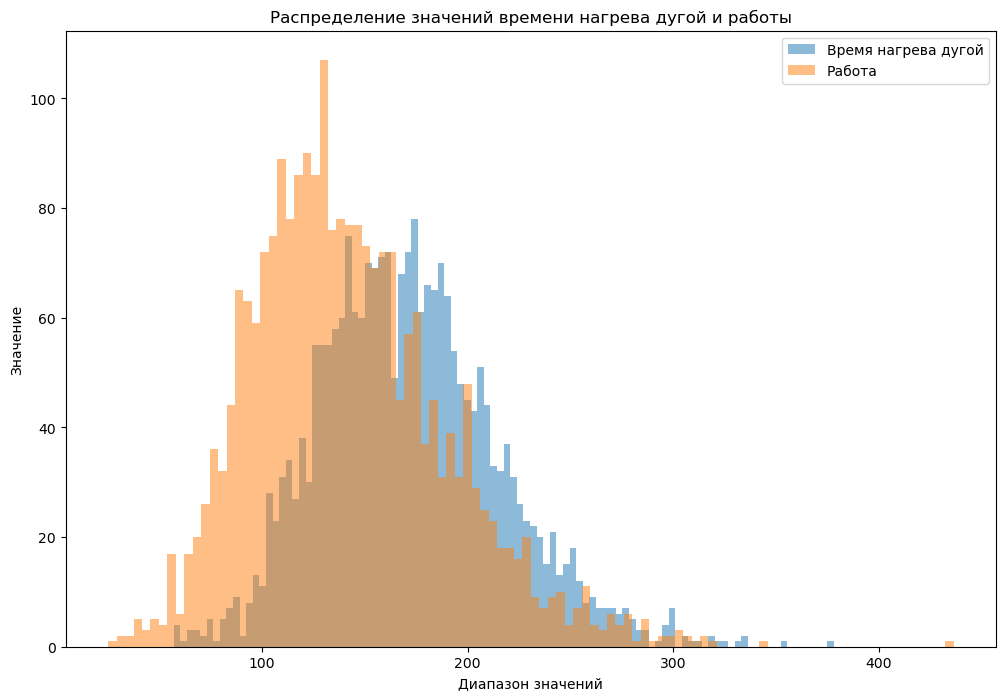

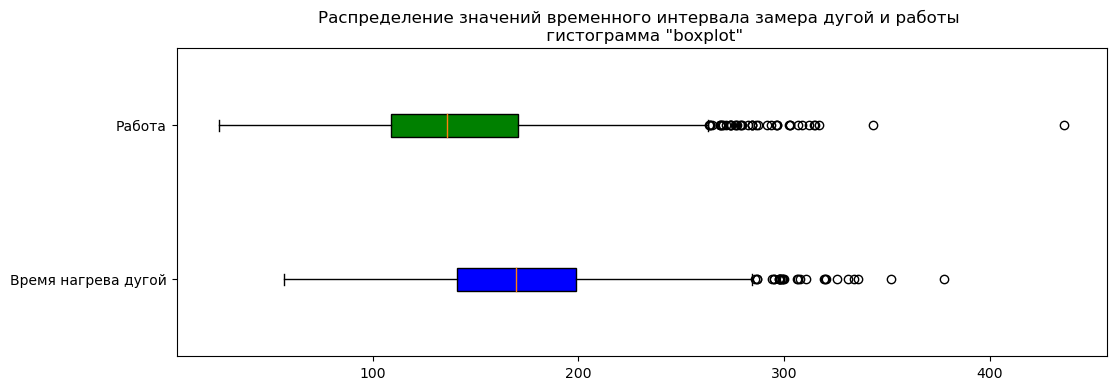

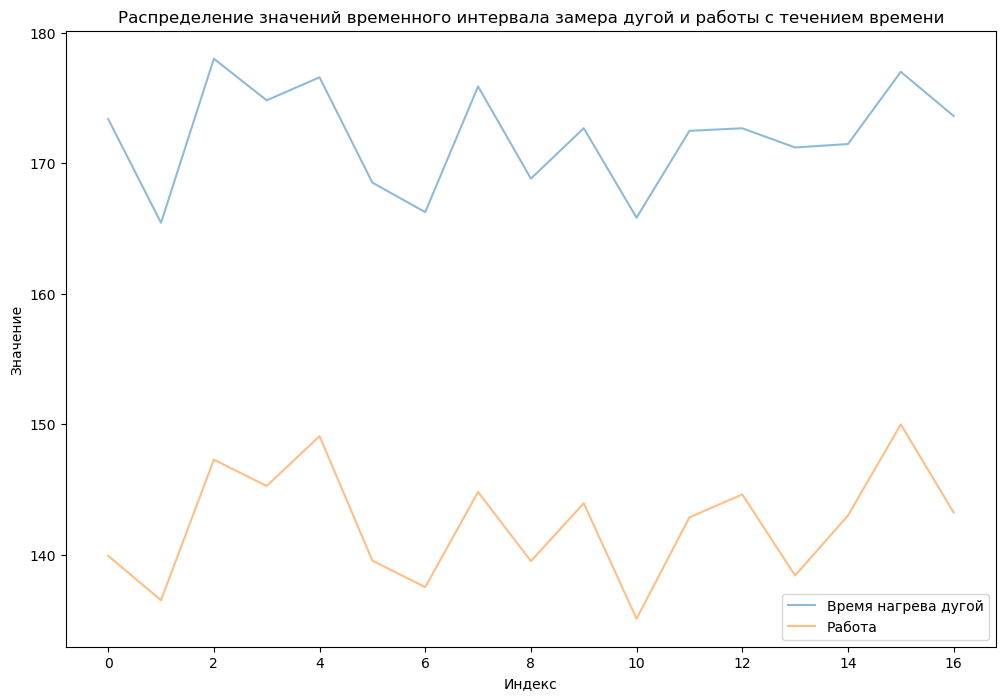

In [50]:
plt.figure(figsize = (12, 8))
plt.hist(df_all['Время нагрева дугой'], bins = 100, alpha = 0.5)
plt.hist(df_all['Работа'], bins = 100, alpha = 0.5)
plt.title('Распределение значений времени нагрева дугой и работы')
plt.xlabel('Диапазон значений')
plt.ylabel('Значение')
plt.legend(['Время нагрева дугой', 'Работа'])
plt.show()

data = [df_all['Время нагрева дугой'], df_all['Работа']]
labels = ['Время нагрева дугой', 'Работа']
colors = ['blue', 'green']
plt.figure(figsize = (12, 4))
x = plt.boxplot(data, labels = labels, patch_artist = True, vert = False)
for box, color in zip(x['boxes'], colors):
    box.set(facecolor = color)
plt.title('Распределение значений временного интервала замера дугой и работы \n гистограмма "boxplot"')
plt.show()

plt.figure(figsize = (12, 8))
plt.plot(np.mean(np.array(df_all['Время нагрева дугой']).reshape(-1, 137), axis=1), alpha = 0.5)
plt.plot(np.mean(np.array(df_all['Работа']).reshape(-1, 137), axis=1), alpha = 0.5)
plt.legend(['Время нагрева дугой', 'Работа'])
plt.title('Распределение значений временного интервала замера дугой и работы с течением времени')
plt.xlabel('Индекс')
plt.ylabel('Значение')
plt.show()

In [51]:
for col in labels:
    print(f'{col}:\n', df_all[col].describe())
    q1 = df_all[col].quantile(0.25)
    q3 = df_all[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = len(df_all[col].loc[(df_all[col] < lower_bound) | (df_all[col] > upper_bound)])
    print('Количество выбросов:', outliers, '\n')

Время нагрева дугой:
 count    2329.000000
mean      172.030434
std        43.741870
min        57.000000
25%       141.000000
50%       169.500000
75%       198.750000
max       378.000000
Name: Время нагрева дугой, dtype: float64
Количество выбросов: 28 

Работа:
 count    2329.000000
mean      142.377692
std        47.563651
min        25.227273
25%       108.756600
50%       136.155418
75%       170.597227
max       436.387492
Name: Работа, dtype: float64
Количество выбросов: 42 



Было исследовано распределений значений для признаков 'Время нагрева дугой', 'Работа': построены гистограммы, диаграммы "ящик с усами", графики изменения значений с течением времени (использование индексов позволяет отслеживать изменения во времени, без привязки к конкретным временным точкам). Были сделаны следующие выводы:

- Определен характер распределений - для обоих признаков нормальное распределение с небольшим скосом вправо;
- С течением времени общая тенденция значений для всех трех признаков остается стабильной;
- Были определены выбросы;
- Числовые характеристики:

|Признак|Среднее значение|Медиана|Минимум|Максимум|Количество выбросов|
|-|-|-|-|-|-|
|Время нагрева дугой|172.0|169.5|25.2|436.4|28|
|Работа|142.4|136.2|25.2|436.4|42|

#### Признаки 'Bulk 3' -  'Bulk 15'

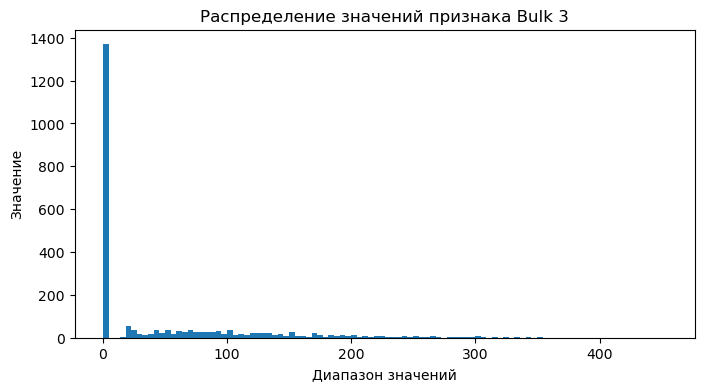

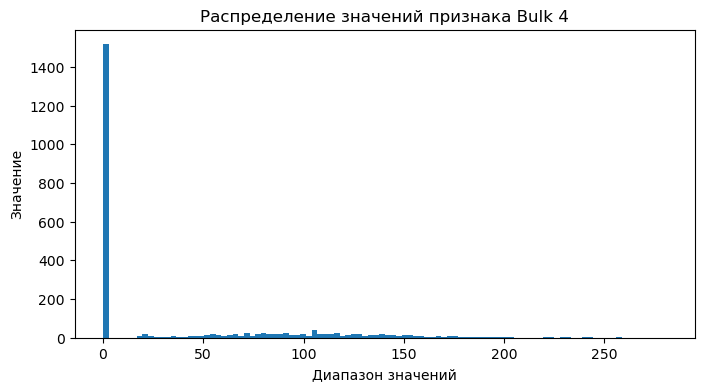

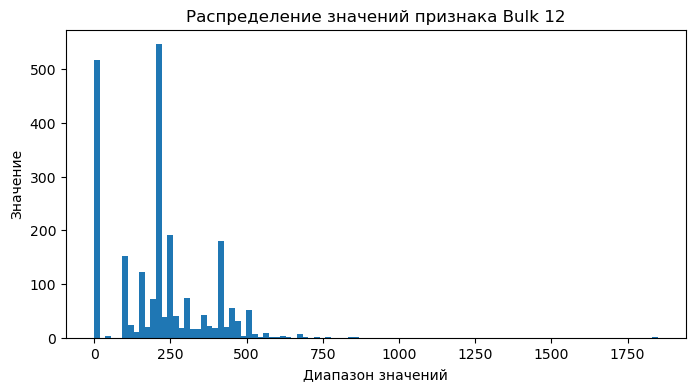

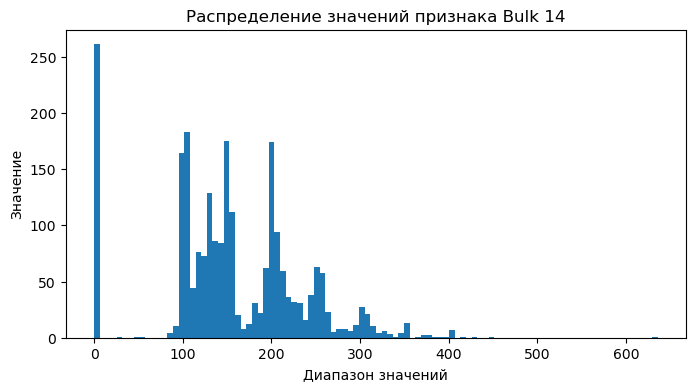

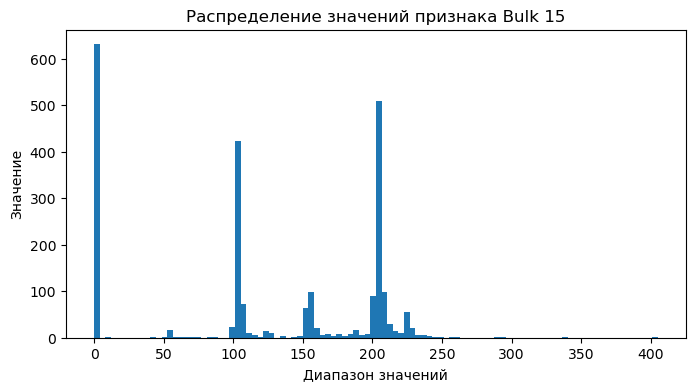

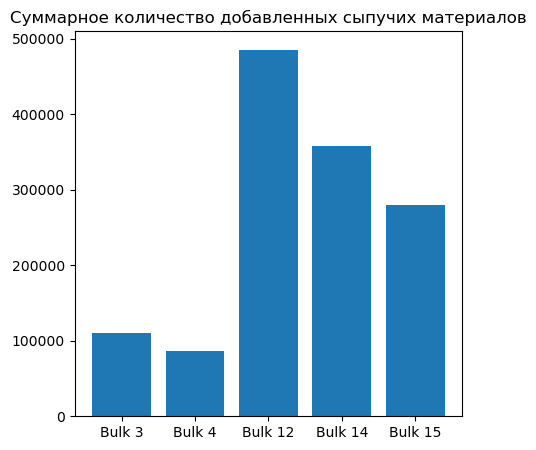

Суммарное количество добавленных сыпучих материалов:


Bulk 3     110274.0
Bulk 4      86880.0
Bulk 12    485400.0
Bulk 14    358325.0
Bulk 15    279370.0
dtype: float64

In [52]:
col_list = [3, 4, 12, 14, 15]
for col in col_list:
    plt.figure(figsize = (8, 4))
    plt.hist(df_all['Bulk ' + str(col)], bins = 100)
    plt.title('Распределение значений признака ' + 'Bulk ' + str(col))
    plt.xlabel('Диапазон значений')
    plt.ylabel('Значение')
    plt.show()
col_list_2 = []
for col in col_list:
    col_list_2.append('Bulk ' + str(col))
plt.figure(figsize = (5, 5))
plt.bar(col_list_2, df_all[col_list_2].sum())
plt.title('Суммарное количество добавленных сыпучих материалов')
plt.show()
print('Суммарное количество добавленных сыпучих материалов:')
df_all[col_list_2].sum()

Было исследовано распределений значений для признаков данных добавления сыпучих материалов. Были сделаны следующие выводы:
- Для признаков Bulk 3, Bulk 4 доминирующим является нулевое значение;
- Для остальных признаков помимо нулевого значения есть несколько других, распределения данных признаков стремится к мультимодальному;
- Определено суммарное количество добавленных сыпучих материалов.Максимальное количество составляет Bulk 12 - 485400.


#### Признаки 'Газ 1', 'Временной интервал', 'Нач-я температура', 'Кон-я температура'

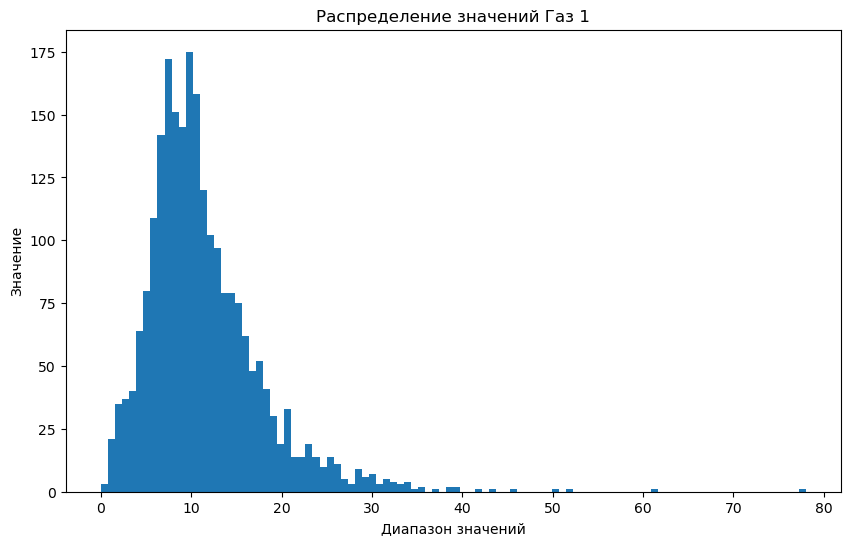

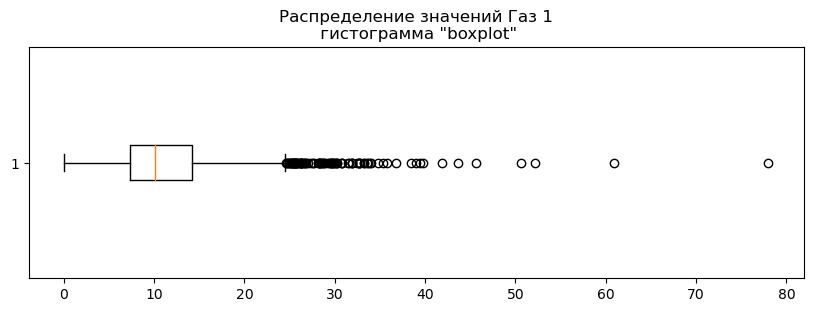

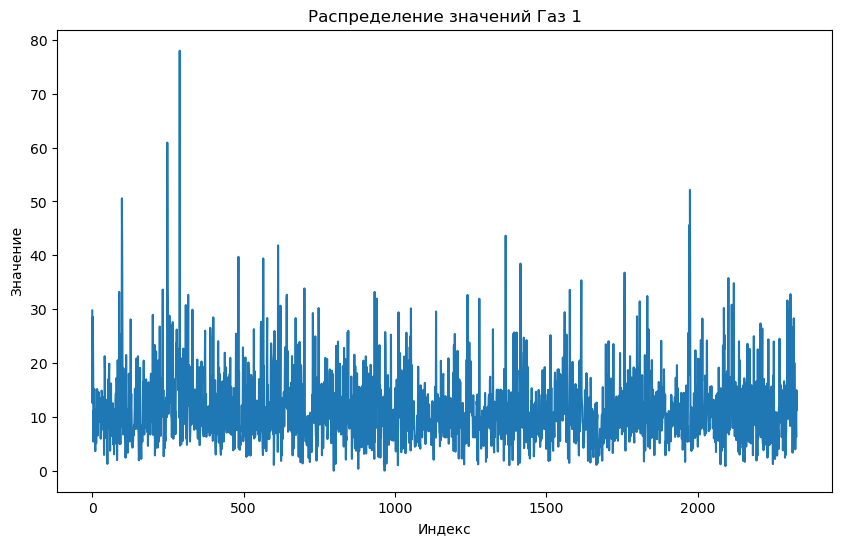

Газ 1:
 count    2329.000000
mean       11.375600
std         6.392041
min         0.008399
25%         7.282948
50%        10.100950
75%        14.216688
max        77.995040
Name: Газ 1, dtype: float64
Количество выбросов: 93 



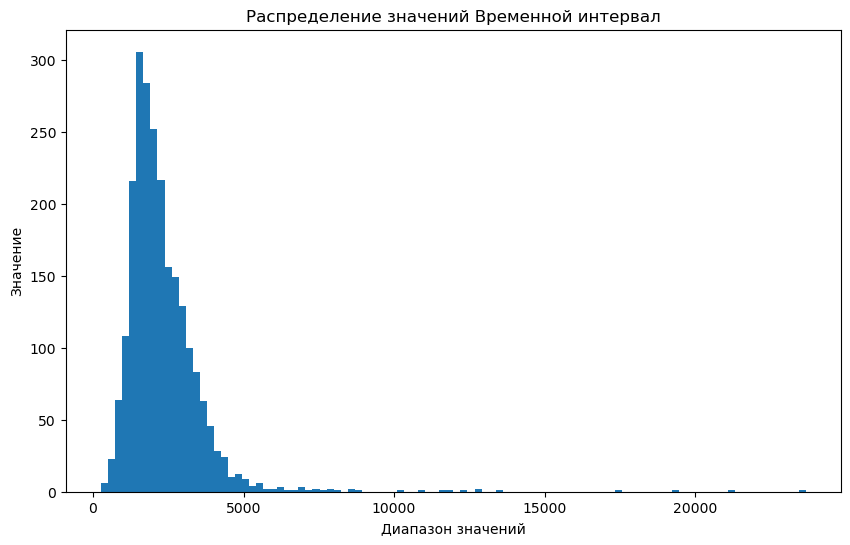

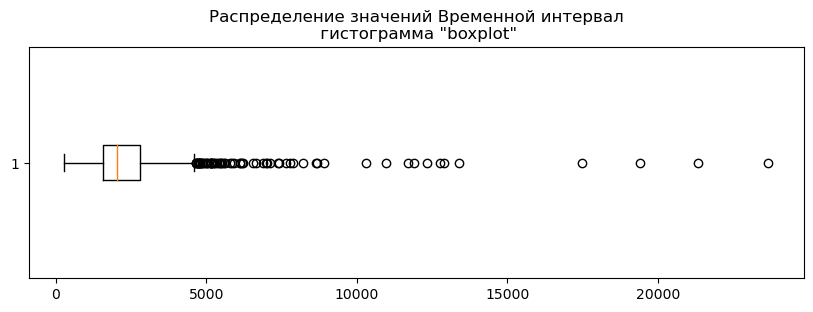

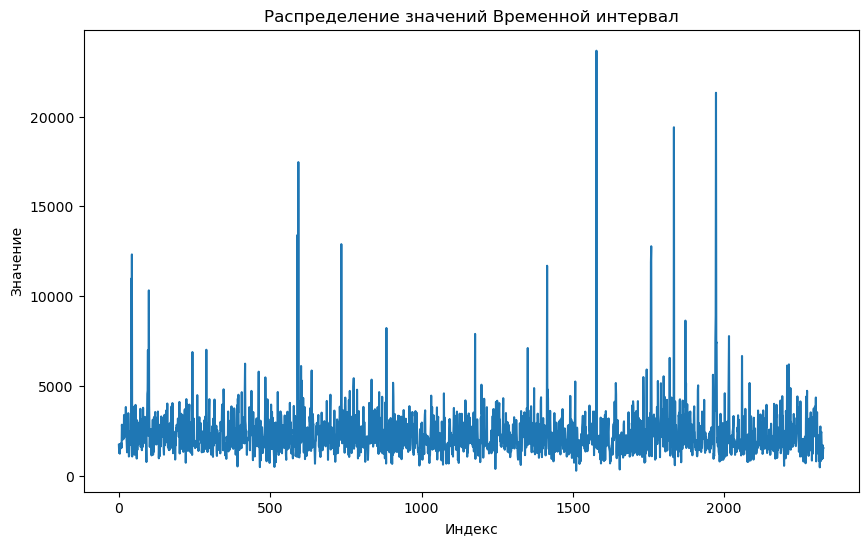

Временной интервал:
 count     2329.000000
mean      2321.810219
std       1385.191527
min        270.000000
25%       1579.000000
50%       2045.000000
75%       2791.000000
max      23674.000000
Name: Временной интервал, dtype: float64
Количество выбросов: 68 



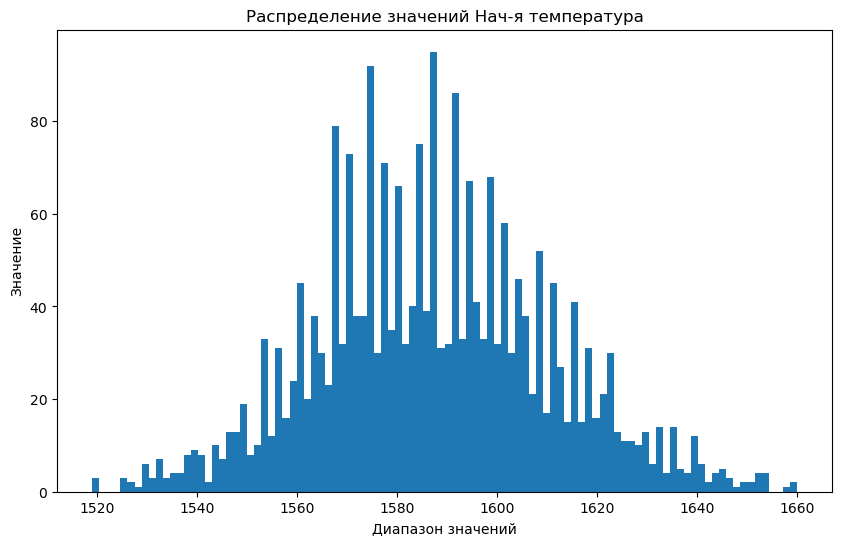

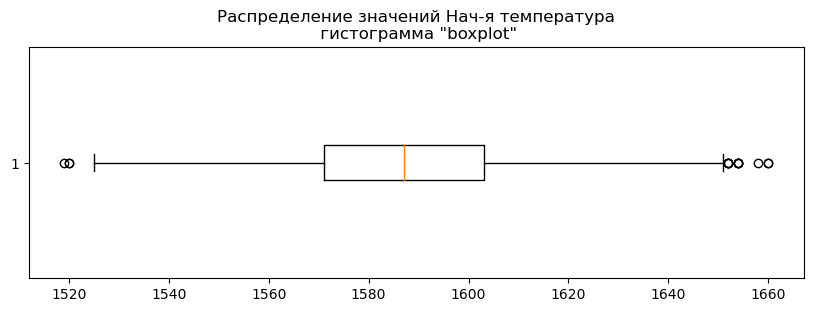

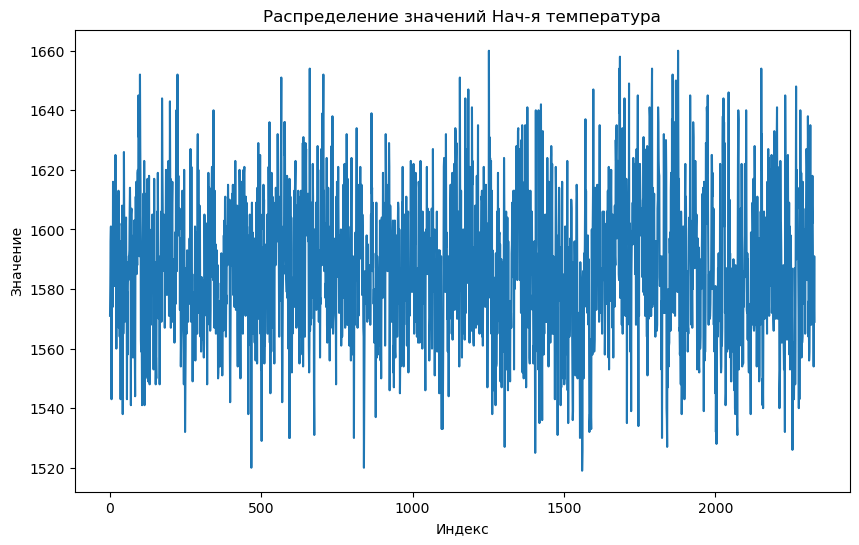

Нач-я температура:
 count    2329.000000
mean     1587.386003
std        23.619841
min      1519.000000
25%      1571.000000
50%      1587.000000
75%      1603.000000
max      1660.000000
Name: Нач-я температура, dtype: float64
Количество выбросов: 14 



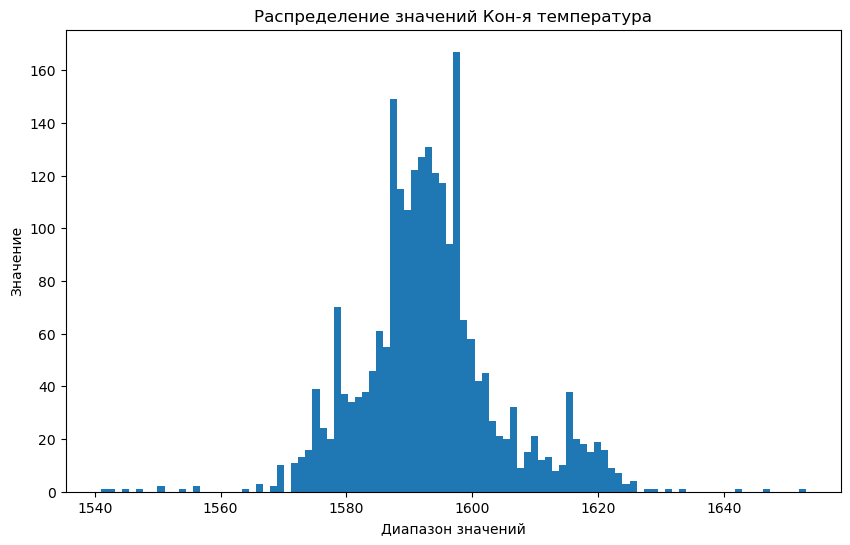

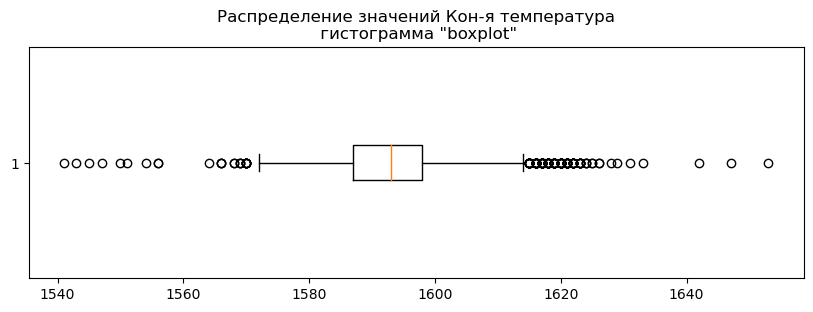

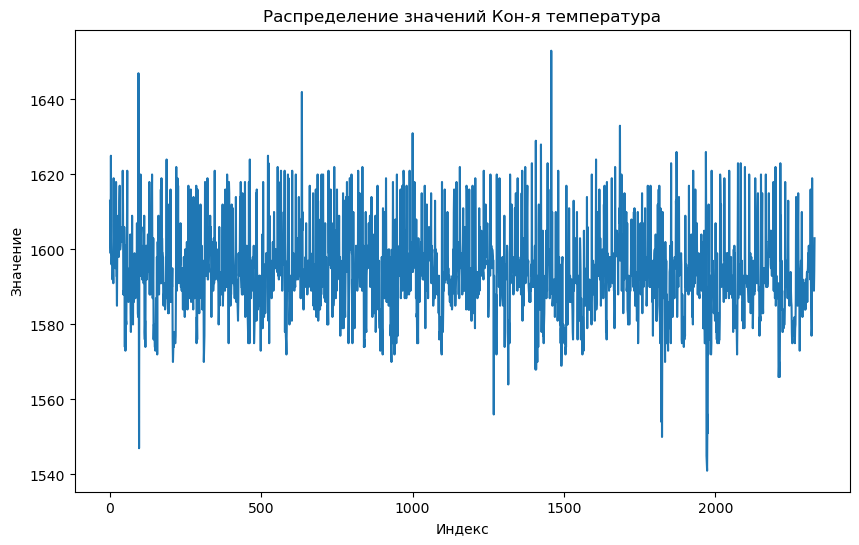

Кон-я температура:
 count    2329.000000
mean     1593.365393
std        11.200915
min      1541.000000
25%      1587.000000
50%      1593.000000
75%      1598.000000
max      1653.000000
Name: Кон-я температура, dtype: float64
Количество выбросов: 181 



In [53]:
for col in ['Газ 1', 'Временной интервал', 'Нач-я температура', 'Кон-я температура']:
    plt.figure(figsize = (10, 6))
    plt.hist(df_all[col], bins = 100)
    plt.title(f'Распределение значений {col}')
    plt.xlabel('Диапазон значений')
    plt.ylabel('Значение')
    plt.show()
    
    plt.figure(figsize = (10, 3))
    plt.boxplot(df_all[col], vert = False)
    plt.title(f'Распределение значений {col}\n гистограмма "boxplot"')
    plt.show()

    plt.figure(figsize = (10, 6))
    plt.plot(df_all[col])
    plt.title(f'Распределение значений {col}')
    plt.xlabel('Индекс')
    plt.ylabel('Значение')
    plt.show()
    
    print(f'{col}:\n', df_all[col].describe())
    q1 = df_all[col].quantile(0.25)
    q3 = df_all[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = len(df_all[col].loc[(df_all[col] < lower_bound) | (df_all[col] > upper_bound)])
    print('Количество выбросов:', outliers, '\n')

Было исследовано распределений значений для признаков 'Газ 1', 'Временной интервал', 'Нач-я температура', 'Кон-я температура': построены гистограммы, диаграммы "ящик с усами", графики изменения значений с течением времени (использование индексов позволяет отслеживать изменения во времени, без привязки к конкретным временным точкам). Были сделаны следующие выводы:

- Определен характер распределений - для признаков "Газ 1" и "Временной интервал" нормальное распределение с небольшим скосом вправо, для признаков 'Нач-я температура', 'Кон-я температура' нормальное распределение, близкое к симметричному;
- Для признака "Нач-я температура" стандартное отклонение значительно выше, чем для признака "Кон-я температура";
- Для признака "Временной интервал" наблюдается большее количество выбросов по сравнению с остальными признаками;
- С течением времени общая тенденция значений для всех признаков остается стабильной;
- Были определены выбросы;
- Числовые характеристики:

|Признак|Среднее значение|Медиана|Минимум|Максимум|Количество выбросов|
|-|-|-|-|-|-|
|Газ 1|11.4|10.4|0.008|80.0|93|
|Временной интервал|2321.8|2045.0|270.0|23674.0|68|
|'Нач-я температура'|1587.4|1587.0|1519.0|1660.0|14|
|'Кон-я температура'|1593.4|1593.0|1541.0|1653.0|181

#### Признаки 'Wire 1', 'Wire2'

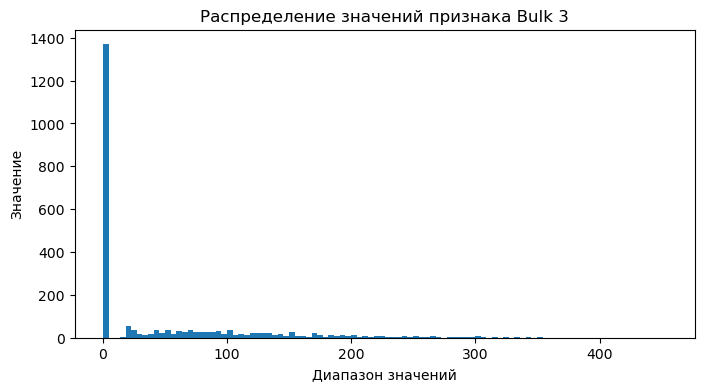

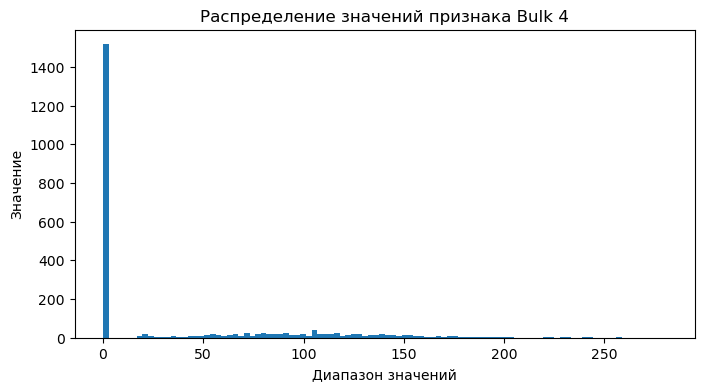

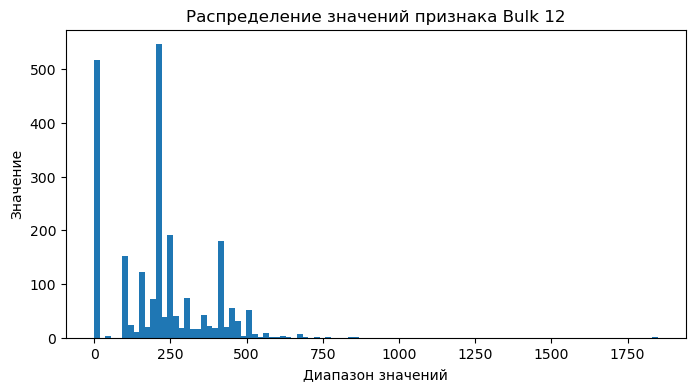

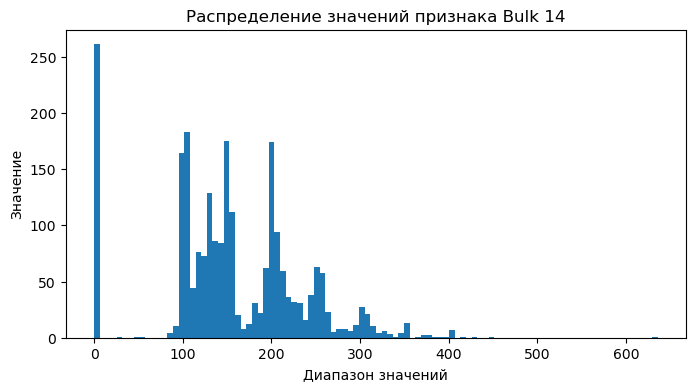

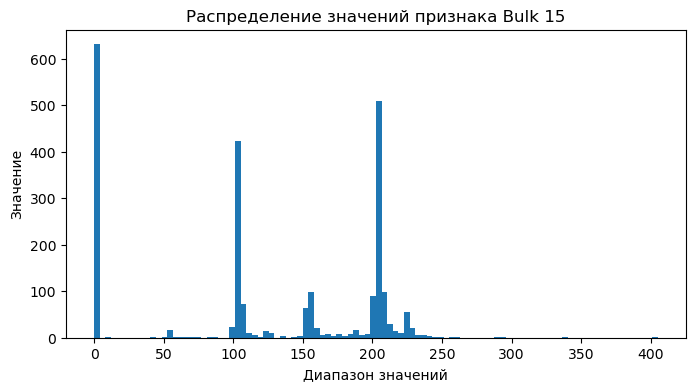

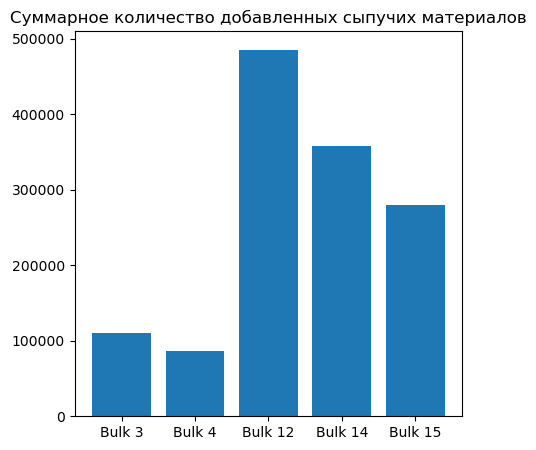

Суммарное количество добавленных сыпучих материалов:


Bulk 3     110274.0
Bulk 4      86880.0
Bulk 12    485400.0
Bulk 14    358325.0
Bulk 15    279370.0
dtype: float64

In [54]:
col_list = [3, 4, 12, 14, 15]
for col in col_list:
    plt.figure(figsize = (8, 4))
    plt.hist(df_all['Bulk ' + str(col)], bins = 100)
    plt.title('Распределение значений признака ' + 'Bulk ' + str(col))
    plt.xlabel('Диапазон значений')
    plt.ylabel('Значение')
    plt.show()
col_list_2 = []
for col in col_list:
    col_list_2.append('Bulk ' + str(col))
plt.figure(figsize = (5, 5))
plt.bar(col_list_2, df_all[col_list_2].sum())
plt.title('Суммарное количество добавленных сыпучих материалов')
plt.show()
print('Суммарное количество добавленных сыпучих материалов:')
df_all[col_list_2].sum()

### Поиск взамосвязей между признаками

Построение корреляционной матрицы.

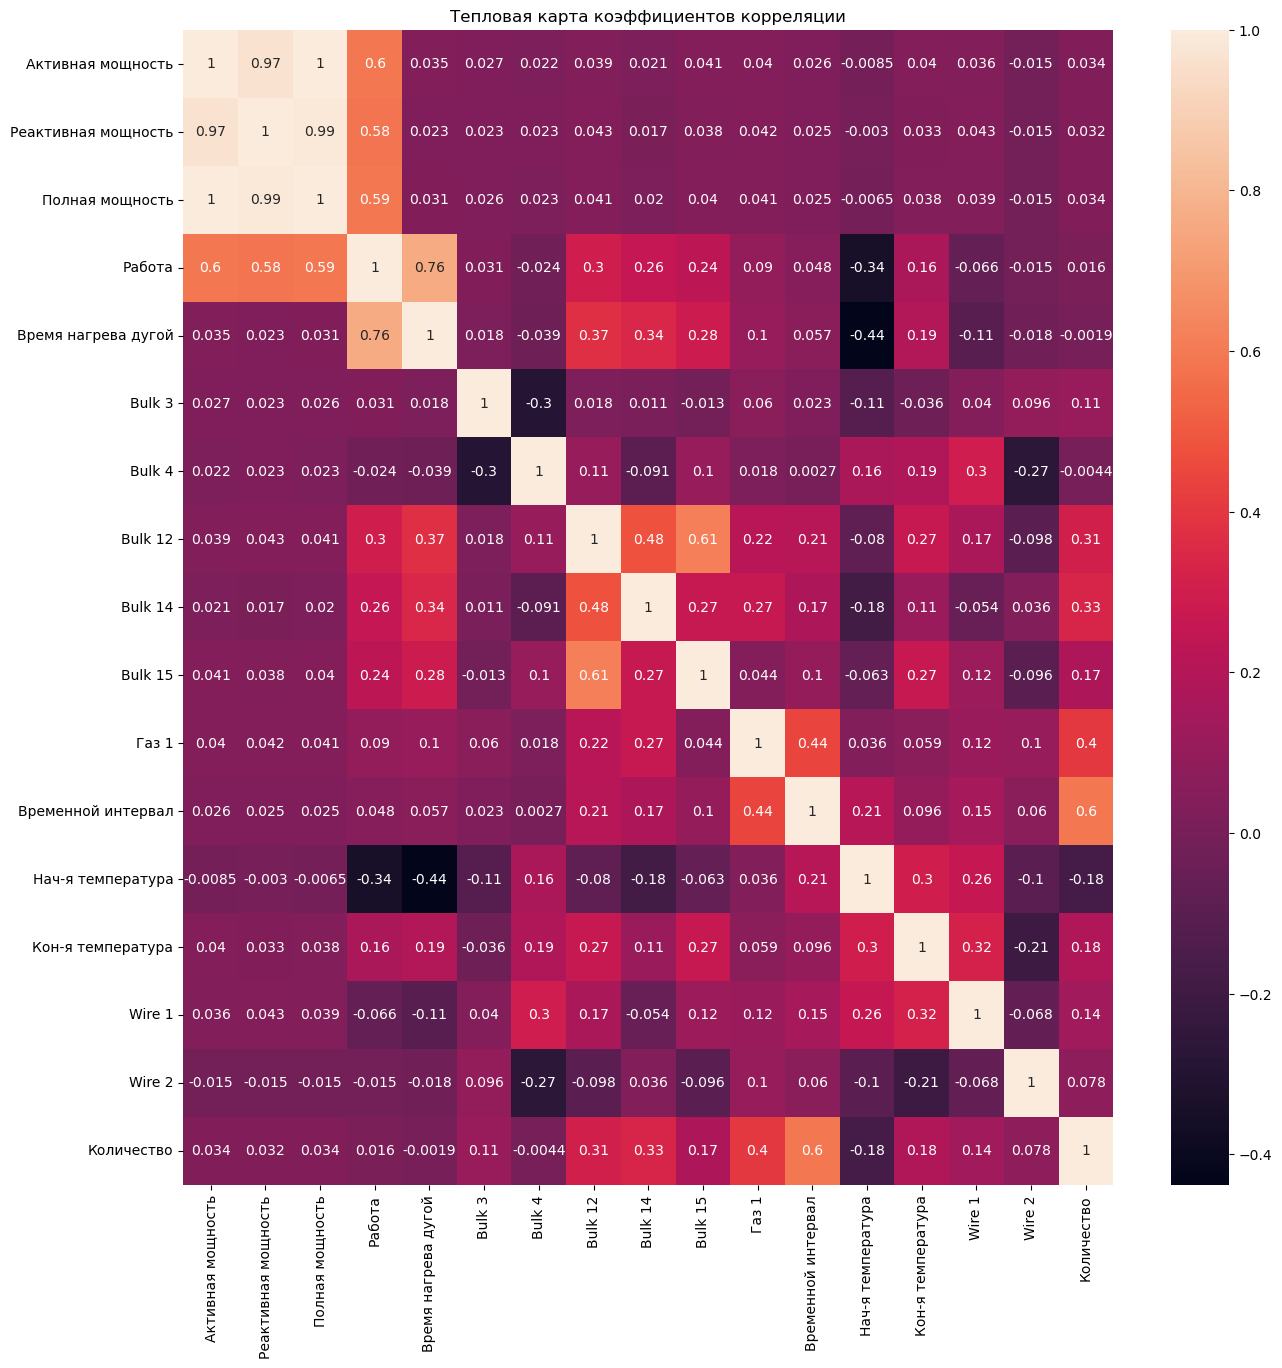

In [55]:
plt.figure(figsize = (15, 15))
sb.heatmap(df_all.corr(), annot = True)
plt.title('Тепловая карта коэффициентов корреляции')
plt.show()

Визуальное отображение полученных резульатов:

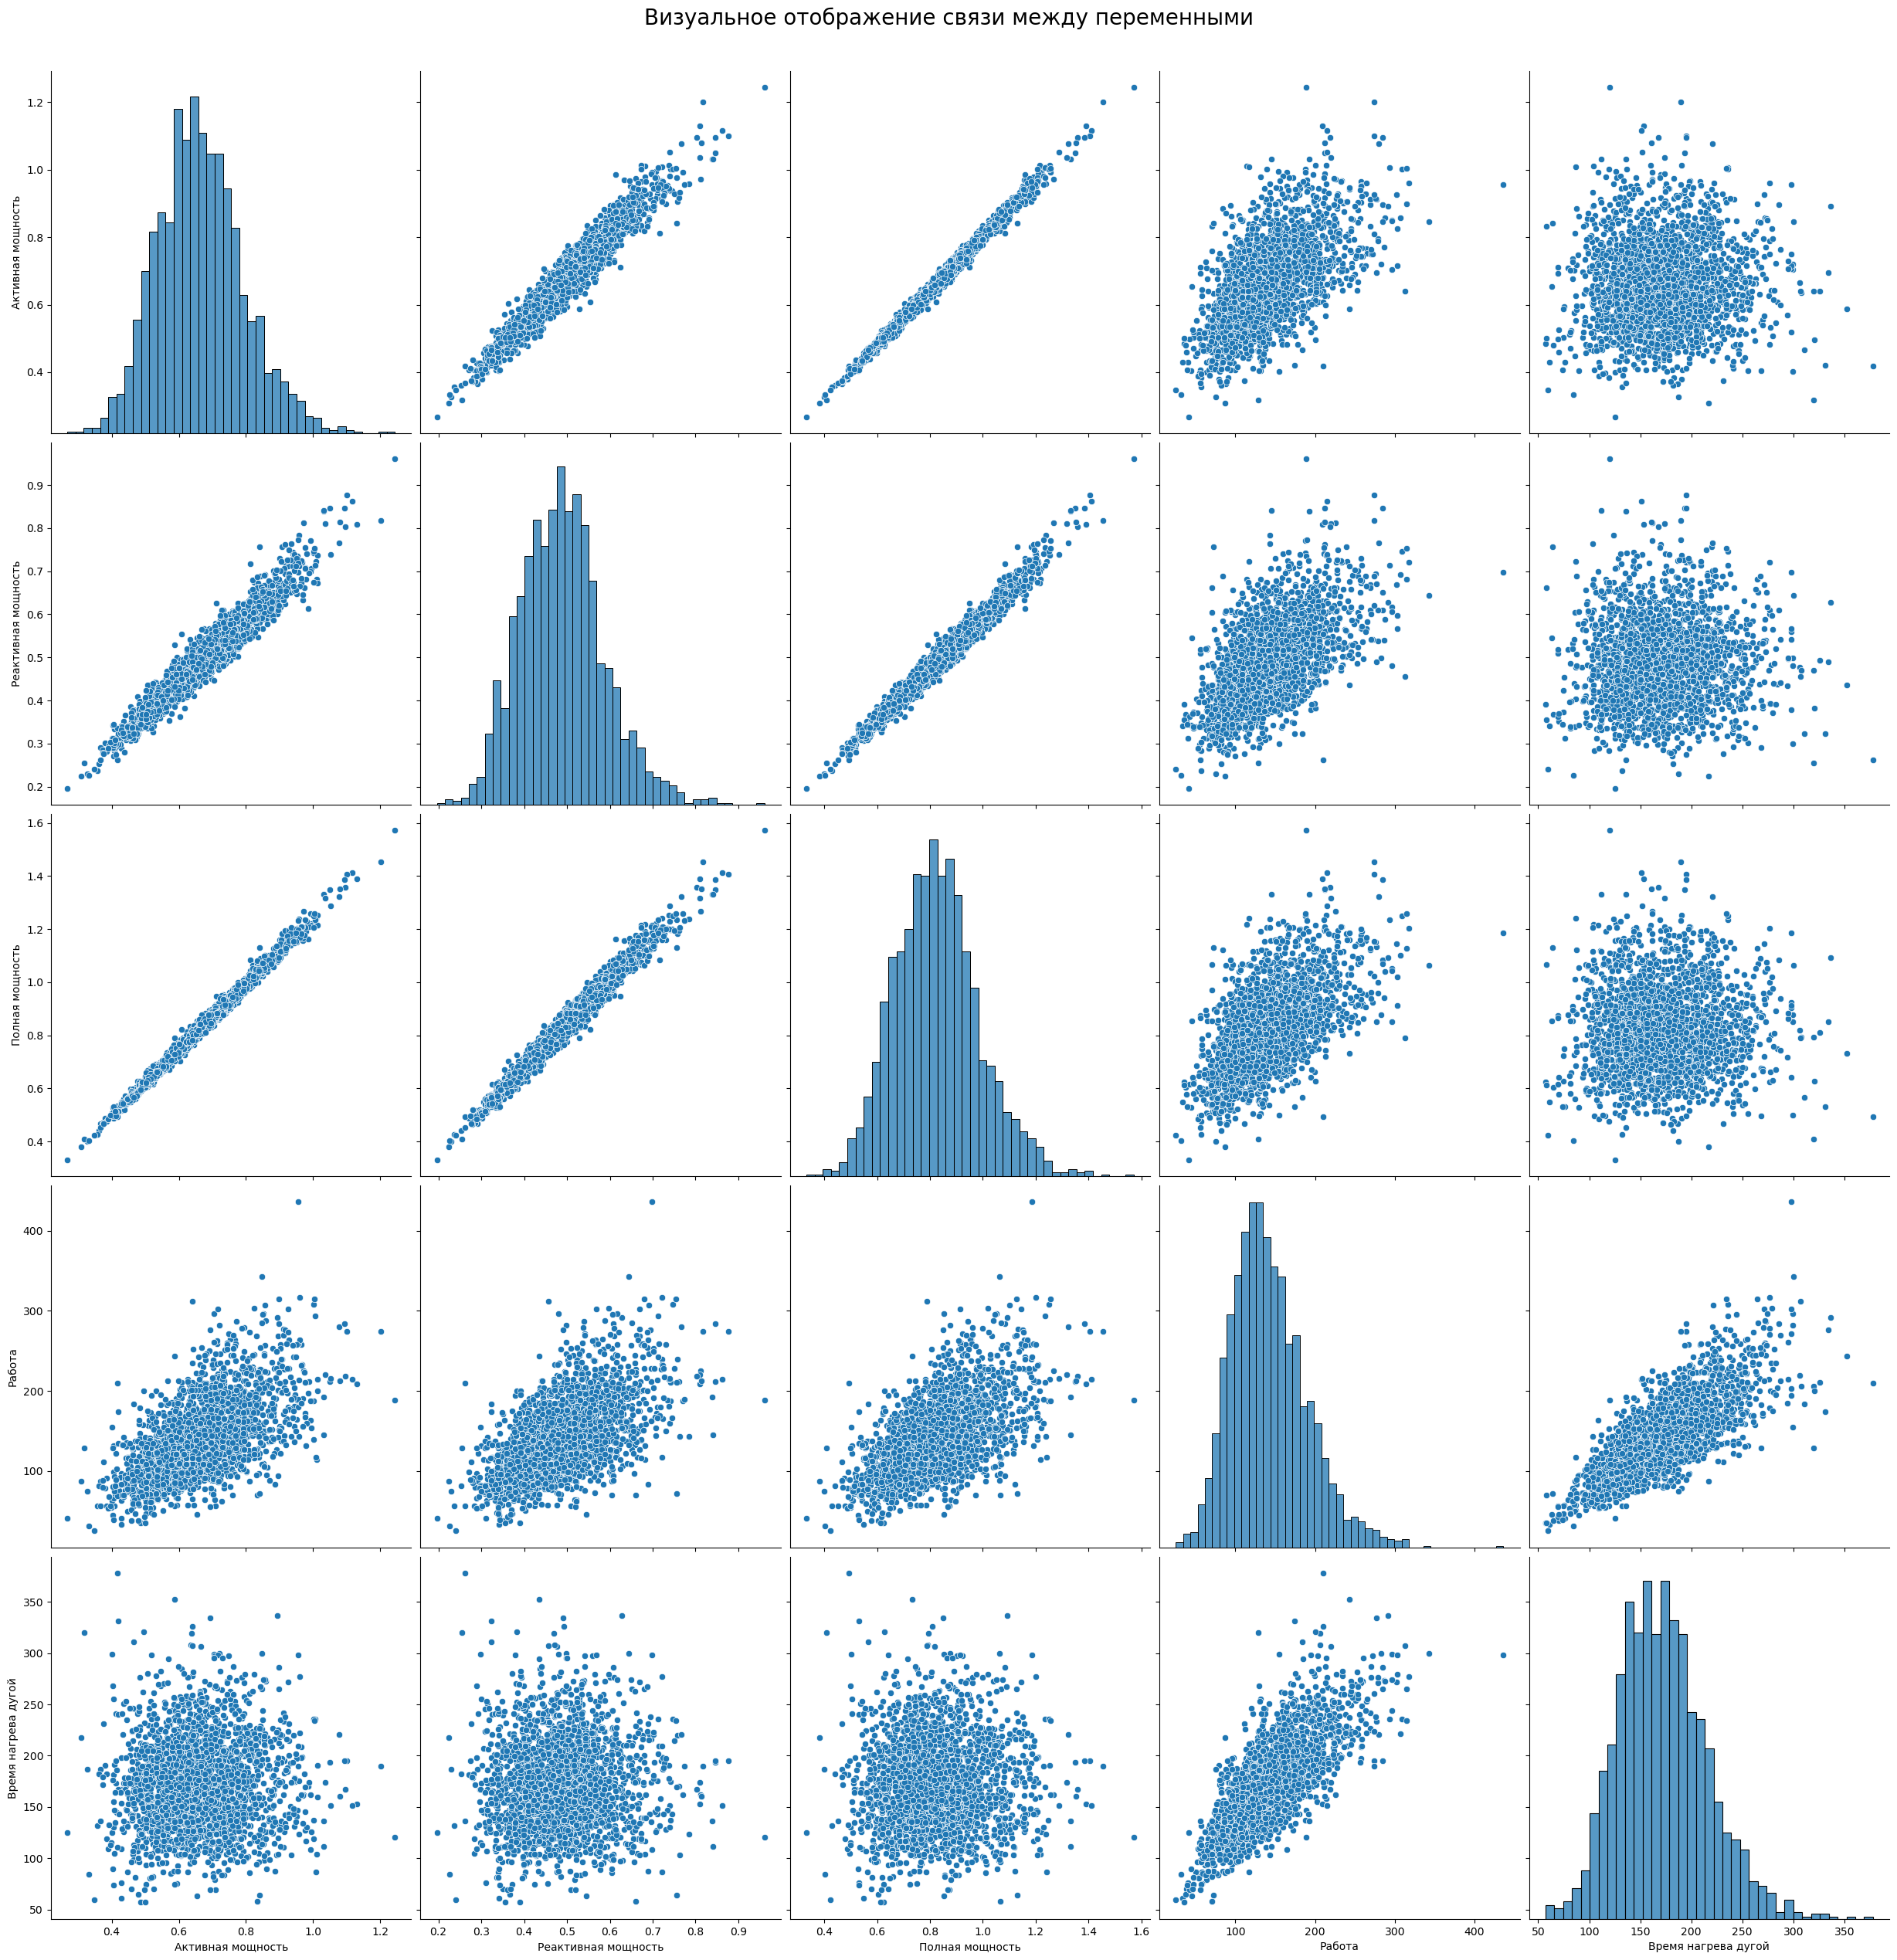

In [56]:
df = df_all[['Активная мощность', 'Реактивная мощность', 'Полная мощность',
                    'Работа', 'Время нагрева дугой']]
g = sb.pairplot(df, height = 5)
g.fig.suptitle('Визуальное отображение связи между переменными', y = 1.02, size = 20)
plt.show()

В результате аналази матрицы коэффициентов корреляции матрицы диаграмм  рассеяния можно сделать вывод о линейной взаимосвязи признаков "Активная мощность", "Реактивная мощность", "Полная мощность". Так признак "Полная мощность" был получен как результат матемаческой опрации над остальными, для уменьшения размерности данных и избежания проблемы мультиколлинеарности, только данный признак из этих трех стоит оставить для дальнейшего обучения моделей.

Также наблюдается взаимосвязь между признаками "Работа" и "Время нагрева дугой", однако их связь не достачно близка к линейной, чтобы считать данные признаки корреляционными.

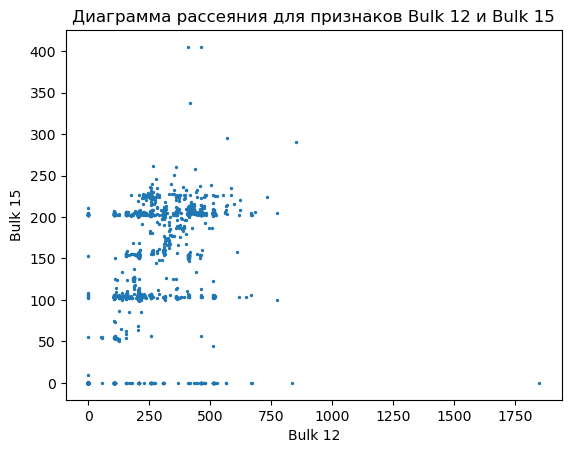

In [57]:
plt.scatter(df_all['Bulk 12'], df_all['Bulk 15'], s = 2)
plt.title('Диаграмма рассеяния для признаков Bulk 12 и Bulk 15')
plt.xlabel('Bulk 12')
plt.ylabel('Bulk 15')
plt.show()

Анализируя визуальное отображение данных и значения коэф-та корреляции можно сделать заключение о взаимосвязи данных признаков, однако в виду недостатка информации о признаках и характере их происхождения, нельзя сделать окончательный вывод о характере их связи.

## Обучение моделей машинного обучения

### Разделение выборки на обучающую и тестовую

In [58]:
random_ = 170723

In [59]:
features = df_all.drop('Кон-я температура', axis = 1)
target = df_all['Кон-я температура']
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.25, 
                                                                           random_state = random_)
features_train.shape

(1746, 16)

Фильтрация от выбросов:

In [60]:
for col in ['Активная мощность', 'Реактивная мощность', 'Время нагрева дугой', 'Газ 1',
            'Временной интервал', 'Нач-я температура', 'Кон-я температура']:
    q1 = df_all[col].quantile(0.25)
    q3 = df_all[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    try:
        outliers = len(features_train[col].loc[(features_train[col] < lower_bound) |
                                               (features_train[col] > upper_bound)])
    except:
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = len(target_train[(target_train < lower_bound) | (target_train > upper_bound)])
    print(f'Количество выбросов {col}:', outliers)

Количество выбросов Активная мощность: 25
Количество выбросов Реактивная мощность: 32
Количество выбросов Время нагрева дугой: 14
Количество выбросов Газ 1: 74
Количество выбросов Временной интервал: 49
Количество выбросов Нач-я температура: 8
Количество выбросов Кон-я температура: 136


Так как по условию проекта, количество ключей в обучающей выборке должно быть не менее 1700, производим фильтрацию по выбросам только по некоторым признакам:


In [61]:
features_train_f = features_train.copy()
for col in ['Время нагрева дугой', 'Нач-я температура']:
    q1 = df_all[col].quantile(0.25)
    q3 = df_all[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    features_train_f = features_train_f[(features_train_f[col] > lower_bound) & 
                                        (features_train_f[col] < upper_bound)]
target_train_f = target_train[features_train_f.index]
print('Количество строк в обучающей выборке:', features_train_f.shape[0])


Количество строк в обучающей выборке: 1722


Масштабирование данных для модели линейной регрессии:

In [62]:
scaler = StandardScaler()
scaler.fit(features_train_f) 
features_train_f_sc = features_train_f.copy()
features_test_sc = features_test.copy()
features_train_f_sc[features_train_f_sc.columns] = scaler.transform(features_train_f)
features_test_sc[features_test_sc.columns] = scaler.transform(features_test) 

Удаление коррелирующих признаков для модели линейной регрессии:

In [63]:
features_train_f_sc_noc = features_train_f_sc.drop(['Активная мощность', 'Реактивная мощность'],
                                                   axis = 1)
features_test_sc_noc = features_test_sc.drop(['Активная мощность', 'Реактивная мощность'], axis = 1)

### Обучение модели линейной регрессии

In [64]:
model = LinearRegression()
scores = cross_val_score(model, features_train_f_sc_noc, target_train_f, cv = 4, scoring = 'neg_mean_absolute_error')
print('Метрика MAE:', - scores.mean())

Метрика MAE: 6.246419853360657


Для модели линейной регрессии удалось добиться нужного значения метрики MAE за короткий промежуток времени.

### Обучение модели CatBoostRegressor

In [65]:
print(dt.now())
start = dt.now()
model = CatBoostRegressor(random_state = random_, silent = True)
param = {
    'l2_leaf_reg': np.arange(2.8, 3.5, 0.1),
    'learning_rate' : np.arange(0.01, 0.05, 0.01)
}

grid = GridSearchCV(model, param, cv = 4 , scoring = 'neg_mean_absolute_error')
grid.fit(features_train_f, target_train_f)

print('Лучшие гиперпараметры:', grid.best_params_)
print('Метрика MAE:', - grid.best_score_)
print(f'--- {dt.now() - start} ---') 

2023-09-09 14:33:49.528802
Лучшие гиперпараметры: {'l2_leaf_reg': 3.0, 'learning_rate': 0.03}
Метрика MAE: 6.076330547107424
--- 0:12:08.894865 ---


Для модели CatBoostRegressor удалось добиться нужного значения метрики MAE, однако за более длительный промежуток времени.

### Обучение модели LGBMRegressor

In [66]:
print(dt.now())
start = dt.now()
model = LGBMRegressor(random_state = random_)
param = {
    'n_estimators': range(120, 161, 10),
    'max_depth': range(-1, 6, 1), 
    'reg_lambda': np.arange(0, 0.5, 0.1),
    'learning_rate' : np.arange(0.01, 0.10, 0.01)
}

grid = GridSearchCV(model, param, cv = 4, scoring = 'neg_mean_absolute_error')
grid.fit(features_train_f, target_train_f)

print('Лучшие гиперпараметры:', grid.best_params_)
print('Метрика MAE:', -grid.best_score_)
print(f'--- {dt.now() - start} ---')

2023-09-09 14:45:58.451790
Лучшие гиперпараметры: {'learning_rate': 0.08, 'max_depth': 4, 'n_estimators': 160, 'reg_lambda': 0.30000000000000004}
Метрика MAE: 6.09596534731854
--- 0:18:59.456360 ---


Для модели LGBMRegressor также удалось добиться нужного значения метрики MAE, однако за более длительный промежуток времени, чем на предыдущих моделях.

Среди моделей, обученных на тренеровочной выборке, с учетом подбора гиперпараметров, наилучшего показателя метрики MAE удалось достичь для метрики CatBoostRegressor.

## Тестирование лучшей модели

Определение метрики MAE для лучшей модели на тестовой выборке:

In [67]:
model = CatBoostRegressor(random_state = random_, silent = True,
                          l2_leaf_reg = 3.0, learning_rate = 0.03)
model.fit(features_train_f, target_train_f)
pred_f= model.predict(features_test)
final_mae = mae(pred_f, target_test)
print('Метрика MAE:', final_mae)

Метрика MAE: 6.103591088250715


Сравнение результатов нашей модели с константной моделью и определение коэффициента детерминации (метрика r2):

In [68]:
dummy_r = DummyRegressor( strategy = 'mean')
dummy_r.fit(features_train_f, target_train_f)
pred_d = dummy_r.predict(features_test)
dummy_mae = mae(pred_d, target_test)
print('Метрика MAE для константной модели:', dummy_mae)
print('Метрика MAE для модели CatBoostRegressor:', final_mae)
print('Метрика r2:', r2_score(target_test, pred_f))

Метрика MAE для константной модели: 7.912906927403014
Метрика MAE для модели CatBoostRegressor: 6.103591088250715
Метрика r2: 0.4534627252698844


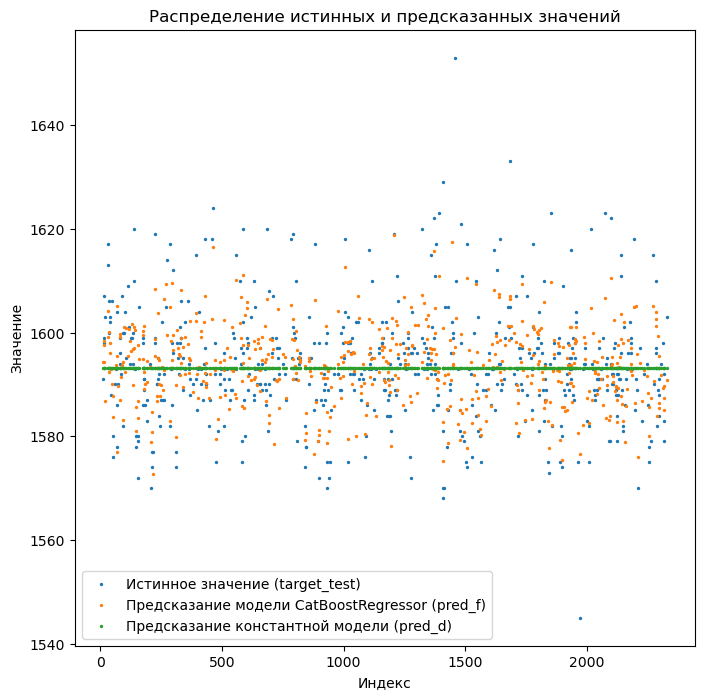

In [69]:
plt.figure(figsize = (8, 8))
plt.scatter(target_test.index, target_test, s = 2)
plt.scatter(target_test.index, pred_f, s = 2)
plt.scatter(target_test.index, pred_d, s = 2)
plt.legend(['Истинное значение (target_test)', 'Предсказание модели CatBoostRegressor (pred_f)',
            'Предсказание константной модели (pred_d)'])
plt.title('Распределение истинных и предсказанных значений')
plt.xlabel('Индекс')
plt.ylabel('Значение')
plt.show()

В результате анализа значений предсказаний для модели CatBoostRegressor и константной модели можно сделать вывод, что модель CatBoostRegressor демонстрирует более точные предсказания, чем константная модель.

Исследование важности признаков для полученной модели:
    

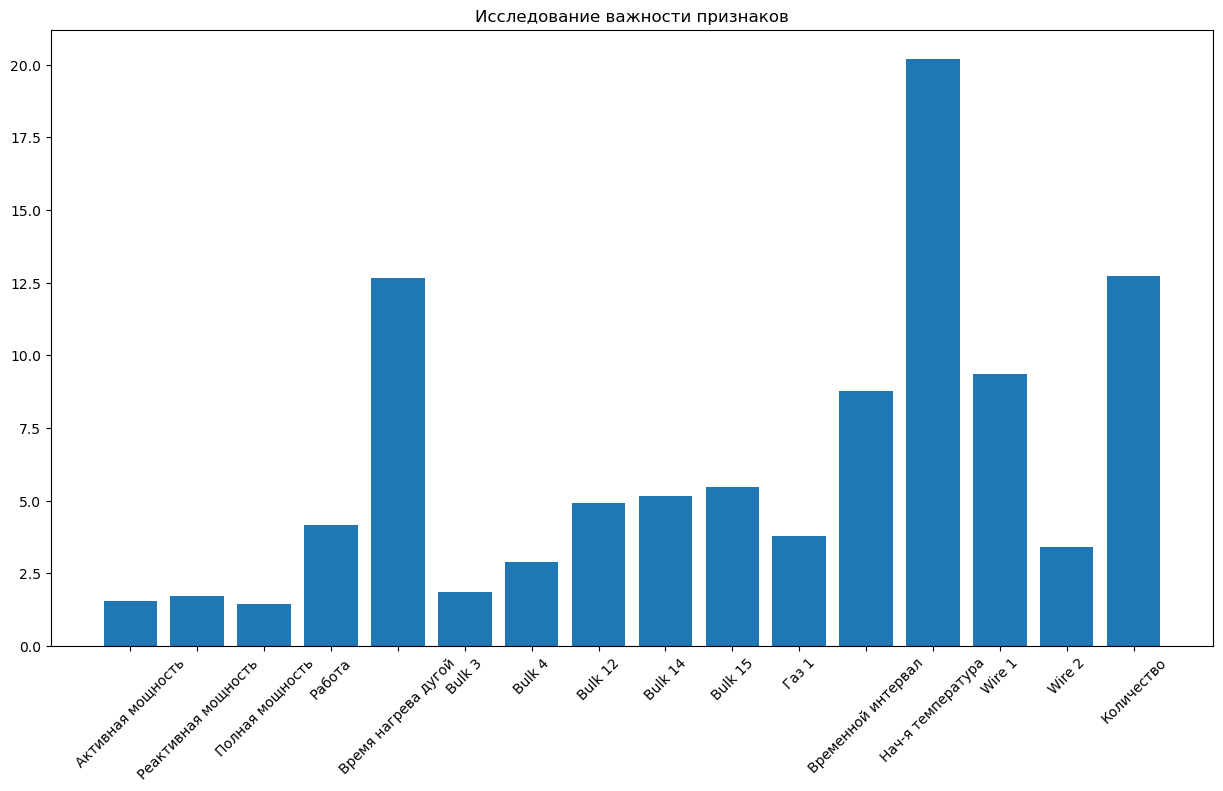

In [70]:
plt.figure(figsize = (15, 8))
plt.bar(features_train_f.columns, model.feature_importances_)
plt.xticks(rotation = 45)
plt.title('Исследование важности признаков')
plt.show()

Были определены значения важности признаков, определенные на основе их вклада в уменьшение функции потерь при построении алгоритма. Таким образом наиболее важным признаком для нашей модели является признак "Нач-я температура", следующими по важности являются признаки "Время нагрева дугой" и "Количество".

## Общий вывод

В результате выполнения проекта были осуществлены следующие шаги:

Проведен предварительный анализ данных, включающий импорт необходимых библиотек, загрузку исходных данных в датафреймы, анализ пропущенных значений и дубликатов, а также составление плана дальнейших работ.

Выполнена предобработка данных, в рамках которой произведено приведение данных к необходимому формату, удаление аномальных значений, создание новых признаков (полная мощность, работа, число итераций, время нагрева дуги, время замера между первой и последней температурами), а также отбор и объединение признаков в единую таблицу.

Проведен исследовательский анализ данных, в ходе которого изучены распределения признаков с помощью гистограмм, определены числовые характеристики данных распределений, а также выявлены взаимосвязи между признаками с использованием корреляционной матрицы и тепловой карты.

Проведено обучение различных моделей машинного обучения, таких как "Линейная регрессия", "CatBoostRegressor" и "XGBRegressor", на тренировочной выборке. В процессе обучения был выполнен подбор гиперпараметров с применением кроссвалидации, и на основе метрики MAE была выбрана лучшая модель - "CatBoostRegressor".

Проверено качество лучшей модели на тестовой выборке, определено итоговое значение метрики MAE, которое составило 6.1, соответствуя условиям проекта. Также проведено сравнение с константной моделью, рассчитана метрика r2, которая оказалась равной 0.45. Проведен анализ важности признаков, и наиболее значимым из них оказался признак "Начальная температура".